<a href="https://colab.research.google.com/github/kazarezova/bioinformatics_for_NGS_scRNAseq/blob/main/kazarezova_ngs_scRNAseq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 
Найдите датасет scRNA-Seq, соответствующий вашим
научным интересам. Важно, чтобы у этого датасета уже была готовая
аннотация. Создайте AnnData-объект с этим датасетом (лучше, чтобы это был
датасет, состоящий всего из одного батча). В колонке
adata.obs["cell_type"] должна содержаться аннотация клеток по типам.

In [ ]:
# Установка необходимых библиотек
!pip3 install scanpy scrublet scikit-misc leidenalg

# Необходимо, чтобы конкретно прогрузился matplotlib
import os
os.kill(os.getpid(), 9)

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

In [2]:
warnings.filterwarnings("ignore") # Отключаем warning'и, которые могут мешать по ходу работы
sc.settings.verbosity = 3 # Делаем так, чтобы scanpy выводил максимально подробные логи

# Настраиваем общую эстетику картинок
sc.settings.set_figure_params(dpi=150) # Качество картинок
sns.set(font_scale=1) # Размер шрифта
sns.set_style("ticks") # Стиль картинок

In [4]:
adata = sc.read_h5ad("motor_cortex.h5ad")
adata.var_names_make_unique()
print(adata) # Выведем содержимое

AnnData object with n_obs × n_vars = 10739 × 14412
    obs: 'nCount_RNA', 'nFeature_RNA', 'donor_id', 'BICCN_cluster_label', 'cluster_id', 'cluster_color', 'BICCN_subclass_label', 'subclass_id', 'sample_id', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.3', 'seurat_clusters', 'seurat_clusters.new', 'label_for_heatmap', 'BICCN_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'BICCN_subclass_label_colors', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne'


In [5]:
adata.X

<10739x14412 sparse matrix of type '<class 'numpy.float32'>'
	with 19922710 stored elements in Compressed Sparse Row format>

In [6]:
adata.obs # Шапка датафрейма с аннотацией клеток

nCount_RNA  nFeature_RNA  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01            5026.0          2228   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01            5798.0          2767   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01            1778.0          1241   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01            4272.0          1990   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01            3776.0          1720   
...                                                        ...           ...   
mouse_pBICCNsMMrMOpRPiM008d190320_TTGAACGTCGTTGTGA      5325.0          2513   
mouse_pBICCNsMMrMOpRPiM008d190320_TTGGTTTTCGCATTAG      4260.0          2349   
mouse_pBICCNsMMrMOpRPiM008d190320_TTTCACATCTGAGCAT      1169.0           898   
mouse_pBICCNsMMrMOpRPiM008d190320_TTTGATCCAGGCTACC      1217.0           935   
mouse_pBICCNsMMrMOpRPiM008d190320_TTTGATCGTTGTGCAT      2699.0          1625   

                                                      donor_id  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01        H18.30.001   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01        H18.30.001   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01        H18.30.001   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01        H18.30.001   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01        H18.30.001   
...                                                        ...   
mouse_pBICCNsMMrMOpRPiM008d190320_TTGAACGTCGTTGTGA        M008   
mouse_pBICCNsMMrMOpRPiM008d190320_TTGGTTTTCGCATTAG        M008   
mouse_pBICCNsMMrMOpRPiM008d190320_TTTCACATCTGAGCAT        M008   
mouse_pBICCNsMMrMOpRPiM008d190320_TTTGATCCAGGCTACC        M008   
mouse_pBICCNsMMrMOpRPiM008d190320_TTTGATCGTTGTGCAT        M008   

                                                         BICCN_cluster_label  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01         Oligo L3-6 OPALIN ENPP6   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01        Oligo L2-6 OPALIN MAP6D1   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01          Micro L1-6 TYROBP CD74   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01        Oligo L2-6 OPALIN FTH1P3   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01        Oligo L2-6 OPALIN FTH1P3   
...                                                                      ...   
mouse_pBICCNsMMrMOpRPiM008d190320_TTGAACGTCGTTGTGA             Oligo Enpp6_1   
mouse_pBICCNsMMrMOpRPiM008d190320_TTGGTTTTCGCATTAG           Astro Aqp4_Gfap   
mouse_pBICCNsMMrMOpRPiM008d190320_TTTCACATCTGAGCAT                     PVM_1   
mouse_pBICCNsMMrMOpRPiM008d190320_TTTGATCCAGGCTACC                      Peri   
mouse_pBICCNsMMrMOpRPiM008d190320_TTTGATCGTTGTGCAT        Astro Aqp4_Slc7a10   

                                                    cluster_id cluster_color  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01               119       #1a3329   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01                79       #387567   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01               128       #94AF97   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01               120       #003a28   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01               120       #003a28   
...                                                        ...           ...   
mouse_pBICCNsMMrMOpRPiM008d190320_TTGAACGTCGTTGTGA          95       #374A45   
mouse_pBICCNsMMrMOpRPiM008d190320_TTGGTTTTCGCATTAG          93       #5A503F   
mouse_pBICCNsMMrMOpRPiM008d190320_TTTCACATCTGAGCAT         114       #8BA38D   
mouse_pBICCNsMMrMOpRPiM008d190320_TTTGATCCAGGCTACC         112       #A77C70   
mouse_pBICCNsMMrMOpRPiM008d190320_TTTGATCGTTGTGCAT          94       #8D7C5D   

                                                   BICCN_subclass_label  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01                      Oligo   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01                      Oligo   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01                  Micro-PVM   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01                      Oligo   
h

In [7]:
adata.obs['donor_id'] # смотрим сколько доноров

human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01          H18.30.001
human_AAGAACACAACACGAG-21L8TX_180927_001_A01          H18.30.001
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01          H18.30.001
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01          H18.30.001
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01          H18.30.001
                                                         ...    
mouse_pBICCNsMMrMOpRPiM008d190320_TTGAACGTCGTTGTGA          M008
mouse_pBICCNsMMrMOpRPiM008d190320_TTGGTTTTCGCATTAG          M008
mouse_pBICCNsMMrMOpRPiM008d190320_TTTCACATCTGAGCAT          M008
mouse_pBICCNsMMrMOpRPiM008d190320_TTTGATCCAGGCTACC          M008
mouse_pBICCNsMMrMOpRPiM008d190320_TTTGATCGTTGTGCAT          M008
Name: donor_id, Length: 10739, dtype: category
Categories (16, object): ['F003', 'F004', 'F005', 'F006', ..., 'M007', 'M008', 'bi005', 'bi006']

In [8]:
adata = adata[adata.obs['donor_id']=='H18.30.001'] # оставляем только одного донора, чтобы был один батч
adata

View of AnnData object with n_obs × n_vars = 1241 × 14412
    obs: 'nCount_RNA', 'nFeature_RNA', 'donor_id', 'BICCN_cluster_label', 'cluster_id', 'cluster_color', 'BICCN_subclass_label', 'subclass_id', 'sample_id', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.3', 'seurat_clusters', 'seurat_clusters.new', 'label_for_heatmap', 'BICCN_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'BICCN_subclass_label_colors', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne'

In [9]:
adata.obs['cell_type'] # есть аннотация по типам клеток

human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01    oligodendrocyte
human_AAGAACACAACACGAG-21L8TX_180927_001_A01    oligodendrocyte
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01    microglial cell
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01    oligodendrocyte
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01    oligodendrocyte
                                                     ...       
human_TTGTTTGAGGTCTGGA-35L8TX_181108_001_D01          astrocyte
human_TTTACTGCACTCTGCT-35L8TX_181108_001_D01    oligodendrocyte
human_TTTAGTCTCAAGAGTA-35L8TX_181108_001_D01    oligodendrocyte
human_TTTCACAAGCACGATG-35L8TX_181108_001_D01    oligodendrocyte
human_TTTCACAAGTGAGTTA-35L8TX_181108_001_D01    oligodendrocyte
Name: cell_type, Length: 1241, dtype: category
Categories (6, object): ['endothelial cell', 'astrocyte', 'oligodendrocyte', 'microglial cell',
                         'leptomeningeal cell', 'oligodendrocyte precursor cell']

In [10]:
adata.var.head() # Шапка датафрейма с аннотацией генов

feature_is_filtered feature_name feature_reference  \
feature_id                                                            
ENSG00000140463                False         BBS4    NCBITaxon:9606   
ENSG00000125533                False      BHLHE23    NCBITaxon:9606   
ENSG00000182667                False          NTM    NCBITaxon:9606   
ENSG00000101440                False         ASIP    NCBITaxon:9606   
ENSG00000100568                False        VTI1B    NCBITaxon:9606   

                feature_biotype  
feature_id                       
ENSG00000140463            gene  
ENSG00000125533            gene  
ENSG00000182667            gene  
ENSG00000101440            gene  
ENSG00000100568            gene

In [11]:
adata.var['feature_id'] = adata.var_names
adata.var.set_index('feature_name', inplace=True)
adata.var.head()

feature_is_filtered feature_reference feature_biotype  \
feature_name                                                          
BBS4                        False    NCBITaxon:9606            gene   
BHLHE23                     False    NCBITaxon:9606            gene   
NTM                         False    NCBITaxon:9606            gene   
ASIP                        False    NCBITaxon:9606            gene   
VTI1B                       False    NCBITaxon:9606            gene   

                   feature_id  
feature_name                   
BBS4          ENSG00000140463  
BHLHE23       ENSG00000125533  
NTM           ENSG00000182667  
ASIP          ENSG00000101440  
VTI1B         ENSG00000100568

# 1.2 
Проведите контроль качества этого датасета способами,
которые были обговорены во время семинаров. Обязательно покажите все
необходимые диагностические графики.


In [12]:
# Выделяем митохондриальные гены
adata.var["mt"] = adata.var_names.str.startswith("MT-") # В датафрейме с описанием генов делаем отдельный столбик, в котором будет храниться True, если ген митохондриальный
adata.var.head()

feature_is_filtered feature_reference feature_biotype  \
feature_name                                                          
BBS4                        False    NCBITaxon:9606            gene   
BHLHE23                     False    NCBITaxon:9606            gene   
NTM                         False    NCBITaxon:9606            gene   
ASIP                        False    NCBITaxon:9606            gene   
VTI1B                       False    NCBITaxon:9606            gene   

                   feature_id     mt  
feature_name                          
BBS4          ENSG00000140463  False  
BHLHE23       ENSG00000125533  False  
NTM           ENSG00000182667  False  
ASIP          ENSG00000101440  False  
VTI1B         ENSG00000100568  False

In [13]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True) # Подсчитываем QC
adata.obs.head()

nCount_RNA  nFeature_RNA  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01      5026.0          2228   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01      5798.0          2767   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01      1778.0          1241   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01      4272.0          1990   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01      3776.0          1720   

                                                donor_id  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01  H18.30.001   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01  H18.30.001   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01  H18.30.001   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01  H18.30.001   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01  H18.30.001   

                                                   BICCN_cluster_label  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01   Oligo L3-6 OPALIN ENPP6   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01  Oligo L2-6 OPALIN MAP6D1   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01    Micro L1-6 TYROBP CD74   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01  Oligo L2-6 OPALIN FTH1P3   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01  Oligo L2-6 OPALIN FTH1P3   

                                              cluster_id cluster_color  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01         119       #1a3329   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01          79       #387567   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01         128       #94AF97   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01         120       #003a28   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01         120       #003a28   

                                             BICCN_subclass_label  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01                Oligo   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01                Oligo   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01            Micro-PVM   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01                Oligo   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01                Oligo   

                                              subclass_id  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01           17   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01           17   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01           20   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01           17   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01           17   

                                                                           sample_id  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01  AAAGGTATCGGCTGGT-21L8TX_180927_001_A01   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01  AAGAACACAACACGAG-21L8TX_180927_001_A01   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01  AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01  AATGGAAAGTCGAGGT-21L8TX_180927_001_A01   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01  AATTCCTGTCATCACA-21L8TX_180927_001_A01   

                                              nCount_SCT  ...  disease  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01      4132.0  ...   normal   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01      4305.0  ...   normal   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01      2728.0  ...   normal   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01      3939.0  ...   normal   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01      3716.0  ...   normal   

                                                  organism     sex  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01  Homo sapiens  female   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01  Homo sapiens  female   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01  Homo sapiens  female   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01  Homo sapiens  female   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01  Homo sapiens  female   

                                                            tissue  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01  primary motor cortex   
human_AAGAACACAACACGAG-21L8TX_180

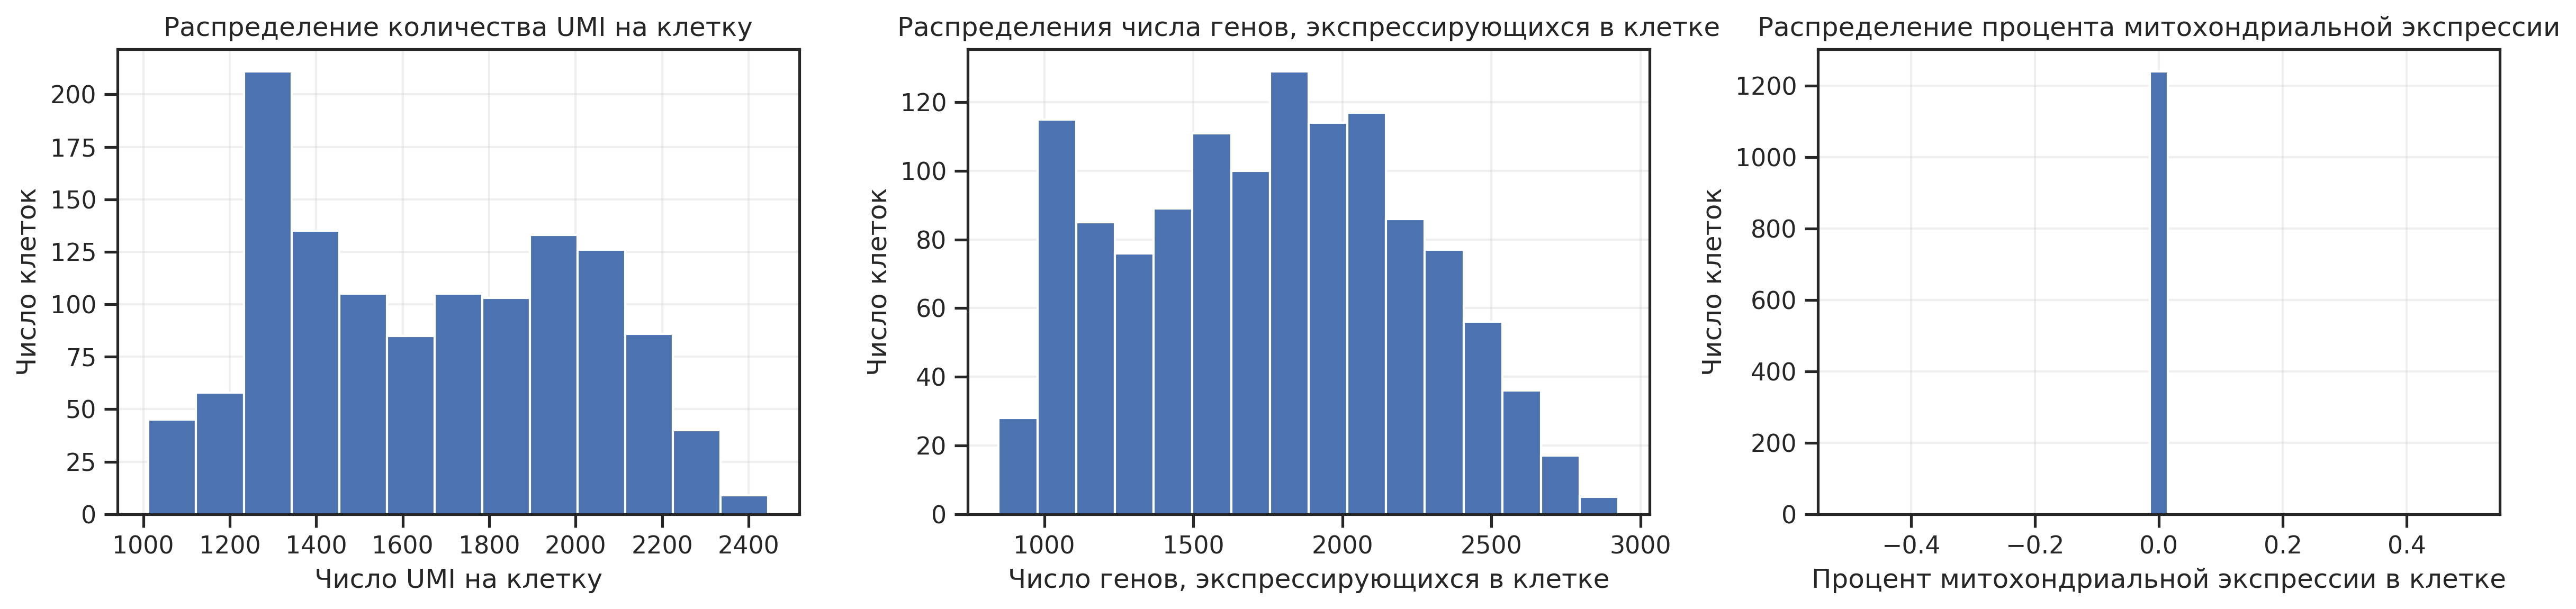

In [14]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4)) # Создаём сетку, чтобы отрисовать три графика

# Отрисовываем распределение общего числа UMI
sns.distplot(adata.obs["total_counts"], kde=False, ax=axes[0], hist_kws={"alpha":1})
axes[0].set_xlabel("Число UMI на клетку")
axes[0].set_ylabel("Число клеток")
axes[0].set_title("Распределение количества UMI на клетку")
axes[0].grid(alpha=0.3)

# Отрисовываем распределение числа генов по клеткам
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, ax=axes[1], hist_kws={"alpha":1})
axes[1].set_xlabel("Число генов, экспрессирующихся в клетке")
axes[1].set_ylabel("Число клеток")
axes[1].set_title("Распределения числа генов, экспрессирующихся в клетке")
axes[1].grid(alpha=0.3)

# Отрисовываем распределение митохондриальной экспрессии
sns.distplot(adata.obs["pct_counts_mt"], kde=False, ax=axes[2], hist_kws={"alpha":1})
axes[2].set_xlabel("Процент митохондриальной экспрессии в клетке")
axes[2].set_ylabel("Число клеток")
axes[2].set_title("Распределение процента митохондриальной экспрессии")
axes[2].grid(alpha=0.3)

fig.tight_layout()

# 1.3 
Проанализируйте датасет стандартным пайплайном
log1pPF, который мы рассматривали во время семинара. Нарисуйте итоговый
эмбеддинг при помощи UMAP и отразите на нём цветом (а) итоговые кластера
и (б) изначальные типы клеток. Сходится ли на первый взгляд кластеризация?

In [15]:
adata_before_log1p = adata.copy() # Сохраним текущую версию adata, чтобы в пункте 1.4 было с чем сравнить

### Устранение дуплетов

In [ ]:
sce.pp.scrublet(adata) # Запускаем scrublet для обнаружения дублетов

In [17]:
adata.obs.head() # Посмотрим начало датафрейма adata.obs

nCount_RNA  nFeature_RNA  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01      5026.0          2228   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01      5798.0          2767   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01      1778.0          1241   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01      4272.0          1990   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01      3776.0          1720   

                                                donor_id  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01  H18.30.001   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01  H18.30.001   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01  H18.30.001   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01  H18.30.001   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01  H18.30.001   

                                                   BICCN_cluster_label  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01   Oligo L3-6 OPALIN ENPP6   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01  Oligo L2-6 OPALIN MAP6D1   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01    Micro L1-6 TYROBP CD74   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01  Oligo L2-6 OPALIN FTH1P3   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01  Oligo L2-6 OPALIN FTH1P3   

                                              cluster_id cluster_color  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01         119       #1a3329   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01          79       #387567   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01         128       #94AF97   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01         120       #003a28   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01         120       #003a28   

                                             BICCN_subclass_label  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01                Oligo   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01                Oligo   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01            Micro-PVM   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01                Oligo   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01                Oligo   

                                              subclass_id  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01           17   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01           17   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01           20   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01           17   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01           17   

                                                                           sample_id  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01  AAAGGTATCGGCTGGT-21L8TX_180927_001_A01   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01  AAGAACACAACACGAG-21L8TX_180927_001_A01   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01  AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01  AATGGAAAGTCGAGGT-21L8TX_180927_001_A01   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01  AATTCCTGTCATCACA-21L8TX_180927_001_A01   

                                              nCount_SCT  ...     sex  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01      4132.0  ...  female   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01      4305.0  ...  female   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01      2728.0  ...  female   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01      3939.0  ...  female   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01      3716.0  ...  female   

                                                            tissue  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01  primary motor cortex   
human_AAGAACACAACACGAG-21L8TX_180927_001_A01  primary motor cortex   
human_AAGCGTTCAAGGAGTC-21L8TX_180927_001_A01  primary motor cortex   
human_AATGGAAAGTCGAGGT-21L8TX_180927_001_A01  primary motor cortex   
human_AATTCCTGTCATCACA-21L8TX_180927_001_A01  primary motor cortex   

                                             self_reported_ethnicity  \
human_AAAGGTATCGGCTGGT-21L8TX_180927_001_A01                 unknown   
human_AAGAACACAACACGAG-21L8TX_18092

In [18]:
adata = adata[~adata.obs.predicted_doublet]
print(adata)

View of AnnData object with n_obs × n_vars = 1234 × 14412
    obs: 'nCount_RNA', 'nFeature_RNA', 'donor_id', 'BICCN_cluster_label', 'cluster_id', 'cluster_color', 'BICCN_subclass_label', 'subclass_id', 'sample_id', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.3', 'seurat_clusters', 'seurat_clusters.new', 'label_for_heatmap', 'BICCN_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_id', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropo

### Контроль за дисперсией

In [19]:
adata.layers["counts"] = adata.X.copy() # Сохраняем в слой counts значения сырых каунтов

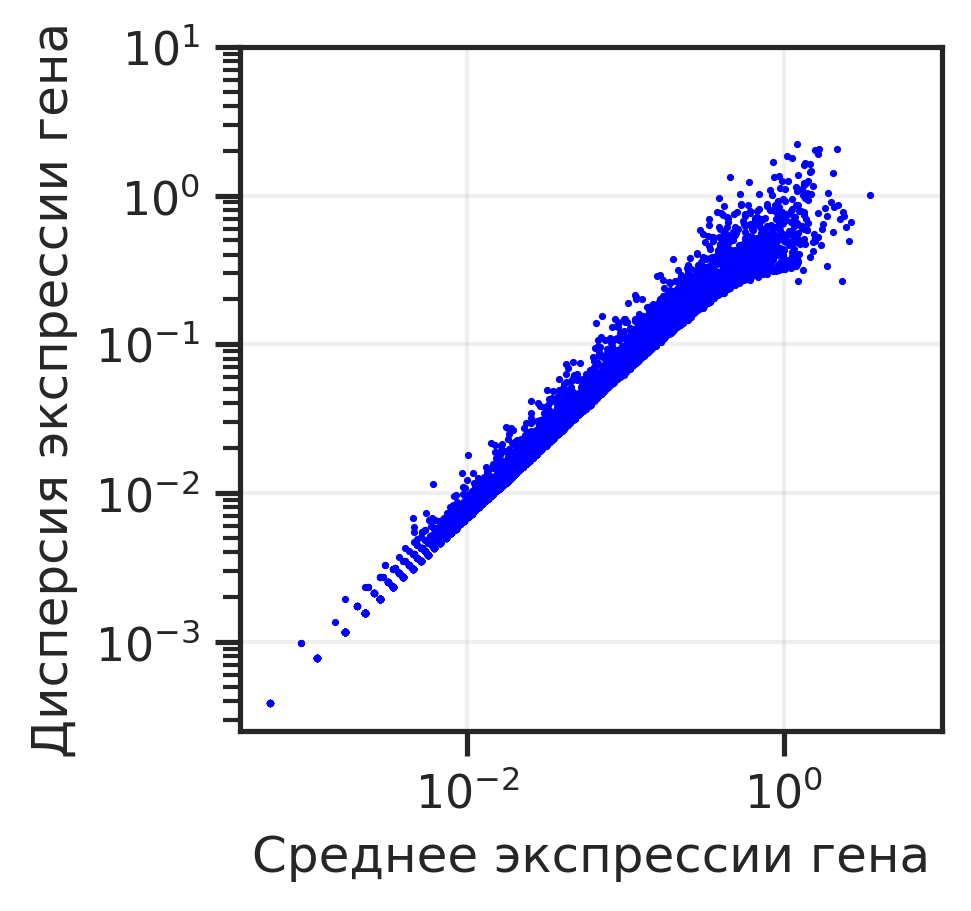

In [20]:
variance = np.var(adata.layers["counts"].A, axis=0)
mean = np.mean(adata.layers["counts"].A, axis=0)

mean = mean[variance > 0]
variance = variance[variance > 0]

fig, ax = plt.subplots(dpi=150, figsize=(3, 3))

sns.scatterplot(x=mean, y=variance, linewidth=0, s=3, color="blue", ax=ax)
ax.set_xlabel("Среднее экспрессии гена"); ax.set_ylabel("Дисперсия экспрессии гена")
ax.set_xscale("log"); ax.set_yscale("log")
ax.set_xlim(0, 10); ax.set_ylim(0, 10)

ax.grid(alpha=0.3)

In [21]:
print("Суммы UMI на клетку до нормировки:", adata.X.sum(axis=1).T)

sc.pp.normalize_total(adata) # Нормировка
print("Суммы UMI на клетку после нормировки:", adata.X.sum(axis=1).T)

Суммы UMI на клетку до нормировки: [[2029.4012 2327.3667 1330.6978 ... 1660.6934 1322.6252 2237.2014]]
normalizing counts per cell
    finished (0:00:00)
Суммы UMI на клетку после нормировки: [[1657.3021 1657.3024 1657.302  ... 1657.302  1657.3021 1657.3021]]


### Подготовка к кластеризации и снижению размерности

In [22]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000,
    layer="counts",
    flavor="seurat_v3",
) # Выделяем высоко вариабельные гены (HVG)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [23]:
adata.var.head() # Выводим верхушку adata.var

feature_is_filtered feature_reference feature_biotype  \
feature_name                                                          
BBS4                        False    NCBITaxon:9606            gene   
BHLHE23                     False    NCBITaxon:9606            gene   
NTM                         False    NCBITaxon:9606            gene   
ASIP                        False    NCBITaxon:9606            gene   
VTI1B                       False    NCBITaxon:9606            gene   

                   feature_id     mt  n_cells_by_counts  mean_counts  \
feature_name                                                           
BBS4          ENSG00000140463  False                197     0.122953   
BHLHE23       ENSG00000125533  False                  0     0.000000   
NTM           ENSG00000182667  False               1198     2.059920   
ASIP          ENSG00000101440  False                 14     0.007820   
VTI1B         ENSG00000100568  False                 98     0.058563   

              pct_dropout_by_counts  total_counts  highly_variable  \
feature_name                                                         
BBS4                      84.125705    152.584976            False   
BHLHE23                  100.000000      0.000000            False   
NTM                        3.464948   2556.363525            False   
ASIP                      98.871878      9.704062            False   
VTI1B                     92.103143     72.676170            False   

              highly_variable_rank     means  variances  variances_norm  
feature_name                                                             
BBS4                           NaN  0.123651   0.085572        0.952220  
BHLHE23                        NaN  0.000000   0.000000        0.000000  
NTM                            NaN  2.059260   0.569167        0.697475  
ASIP                           NaN  0.007864   0.005393        0.925772  
VTI1B                          NaN  0.058895   0.041777        0.965069

In [24]:
adata.raw = adata

In [25]:
adata = adata[:, adata.var.highly_variable] # Оставляем только подмножество генов, которые относятся к HVG
print(adata)

View of AnnData object with n_obs × n_vars = 1234 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'donor_id', 'BICCN_cluster_label', 'cluster_id', 'cluster_color', 'BICCN_subclass_label', 'subclass_id', 'sample_id', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.3', 'seurat_clusters', 'seurat_clusters.new', 'label_for_heatmap', 'BICCN_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_id', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropou

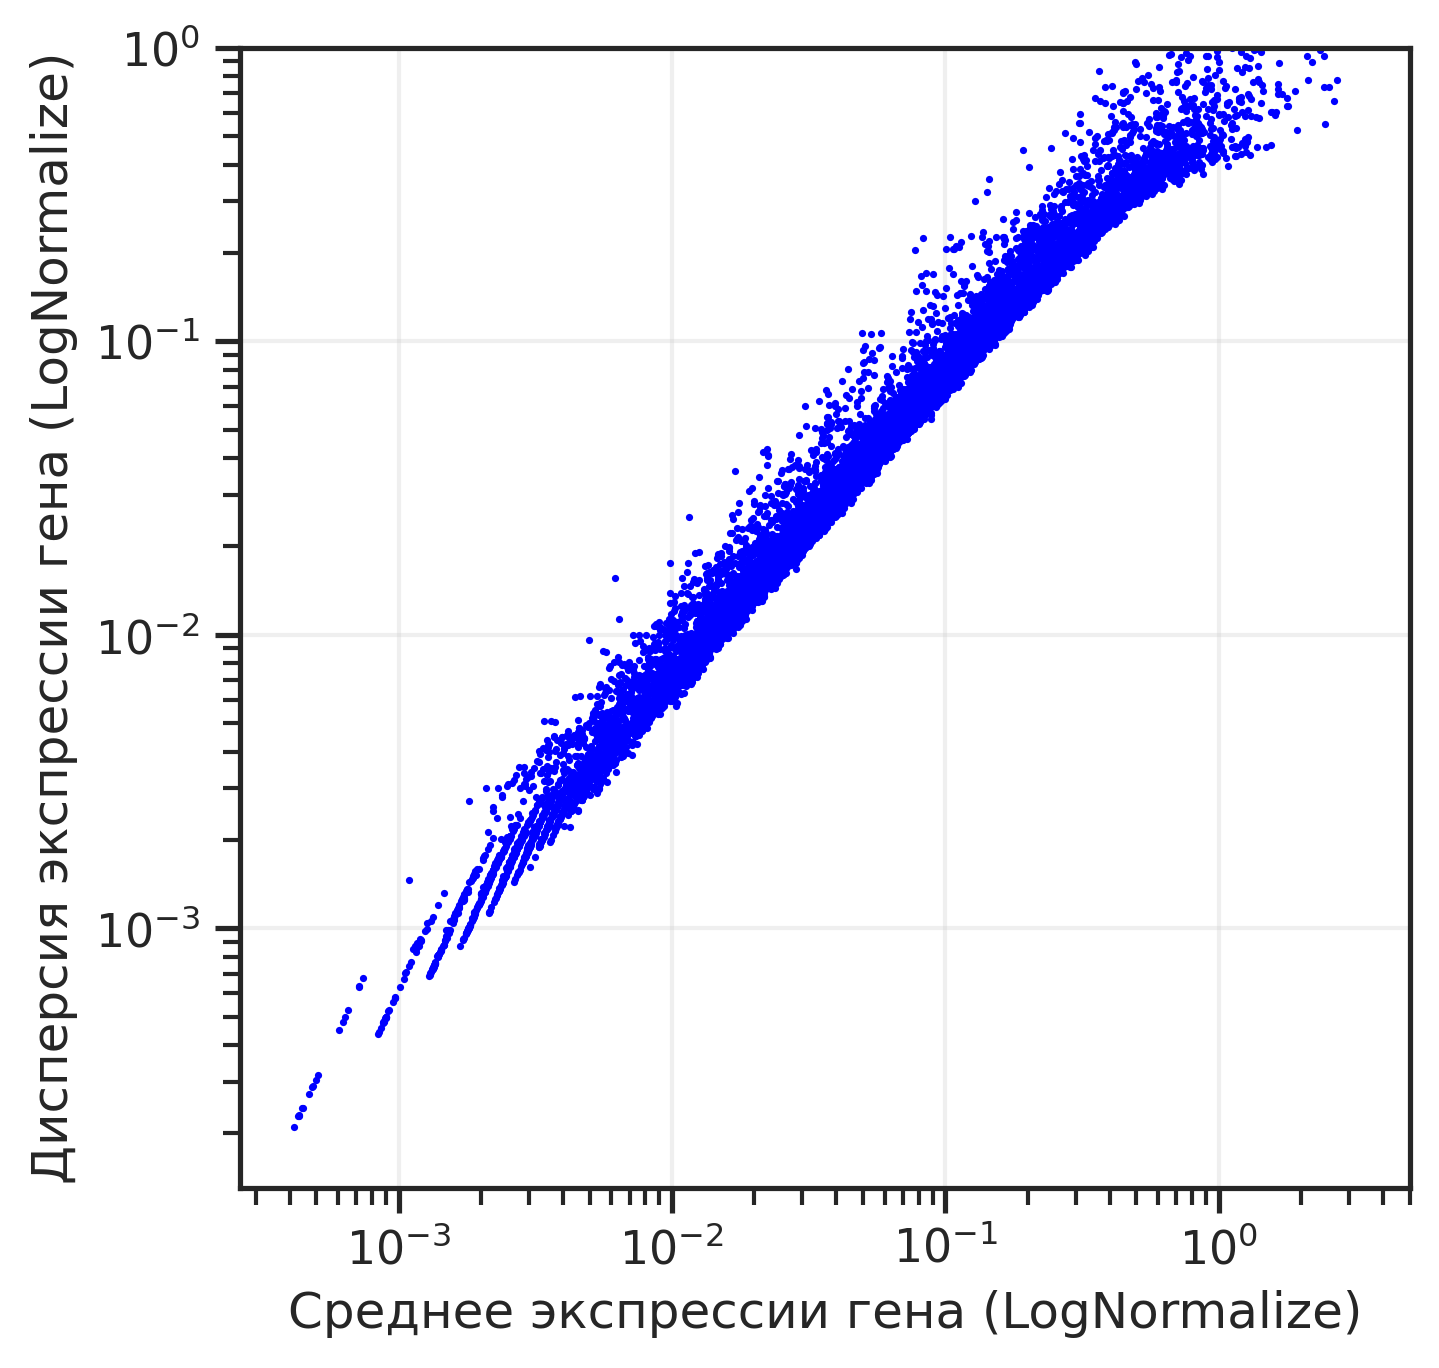

In [26]:
variance = np.var(adata.raw.X.A, axis=0)
mean = np.mean(adata.raw.X.A, axis=0)

mean = mean[variance > 0]
variance = variance[variance > 0]

fig, ax = plt.subplots(dpi=150, figsize=(5, 5))

sns.scatterplot(x=mean, y=variance, linewidth=0, s=3, color="blue", ax=ax)
ax.set_xlabel("Среднее экспрессии гена (LogNormalize)"); ax.set_ylabel("Дисперсия экспрессии гена (LogNormalize)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(0, 5); ax.set_ylim(0, 1)

ax.grid(alpha=0.3)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


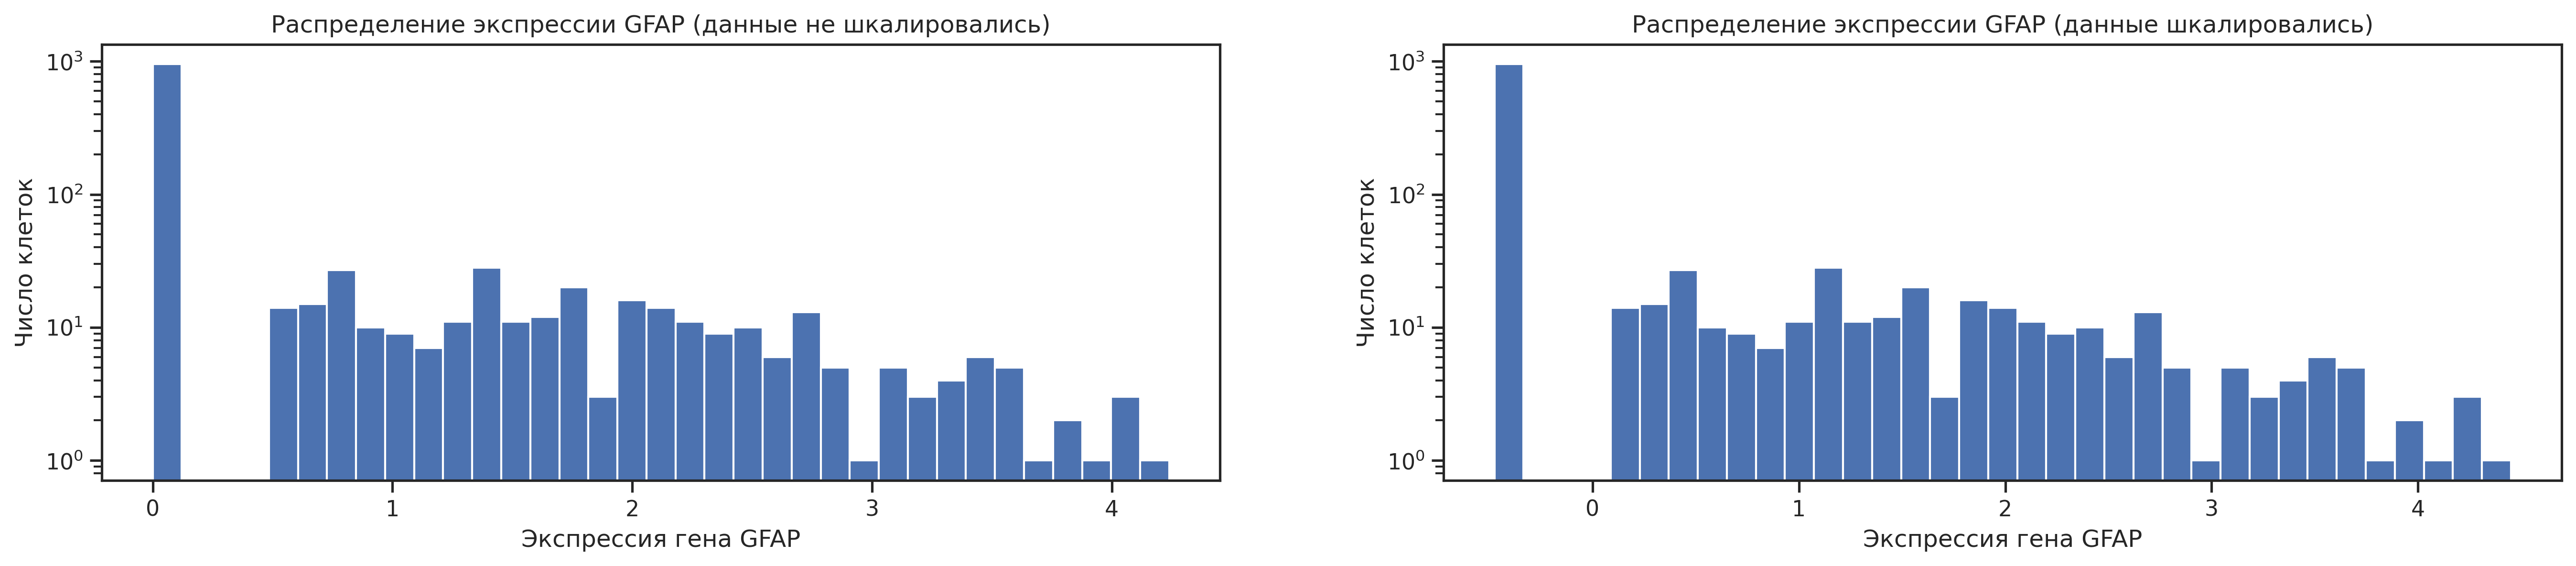

In [27]:
sc.pp.scale(adata) # Шкалирование

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(22, 4)) # Создаём сетку, чтобы отрисовать два графика

# Отрисовываем распределение экспрессии гена GFAP на нешкалированных данных
sns.distplot(adata.raw[:, "GFAP"].X.todense(), kde=False, ax=axs[0], hist_kws={"alpha":1})
axs[0].set_xlabel("Экспрессия гена GFAP")
axs[0].set_ylabel("Число клеток")
axs[0].set_title("Распределение экспрессии GFAP (данные не шкалировались)")
axs[0].set_yscale("log")

# Отрисовываем распределение экспрессии гена GFAP на нешкалированных данных
sns.distplot(adata[:, "GFAP"].X, kde=False, ax=axs[1], hist_kws={"alpha":1})
axs[1].set_xlabel("Экспрессия гена GFAP")
axs[1].set_ylabel("Число клеток")
axs[1].set_title("Распределение экспрессии GFAP (данные шкалировались)")
axs[1].set_yscale("log")

### Снижение размерности и кластеризация

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


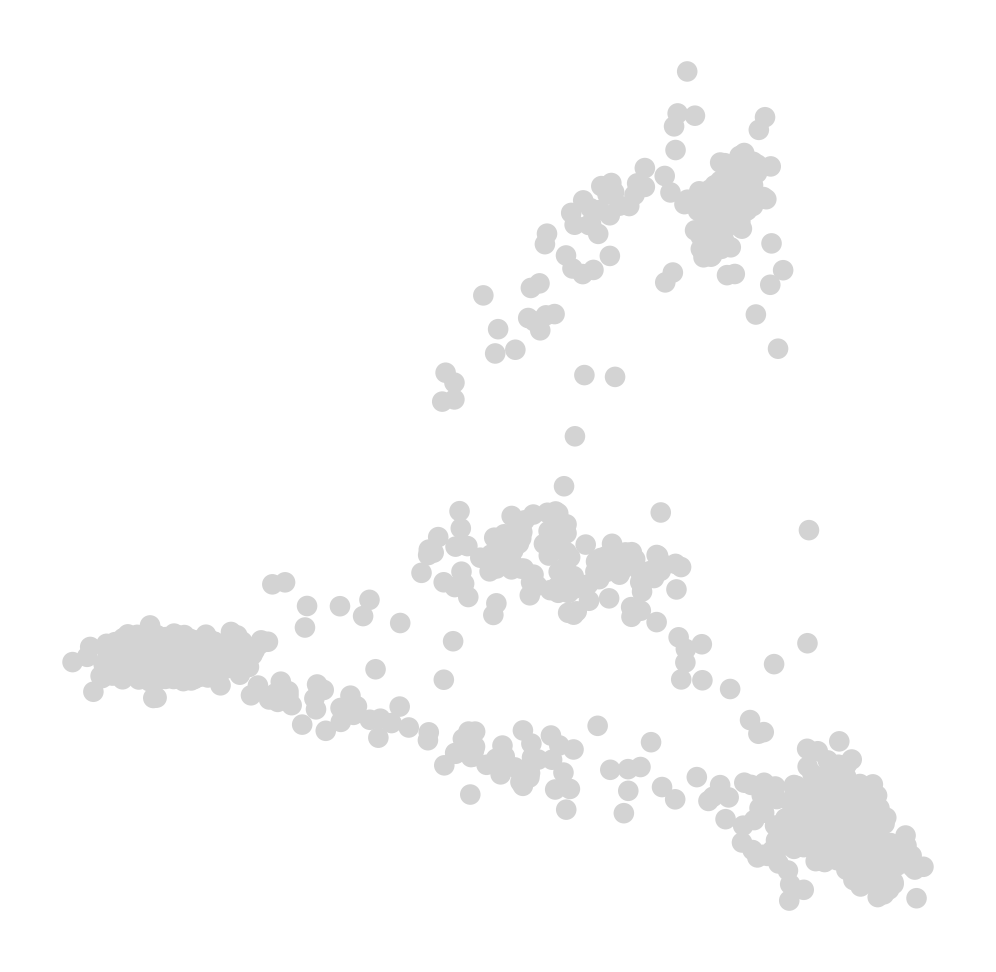

In [28]:
sc.tl.pca(adata) # Вычисляем PCA
sc.pl.pca(adata, frameon=False) # Отрисовываем PCA

SLC1A3 - экспрессионный маркер астроцитов, MBP - олигодендроцитов, PTPRC - микроглии

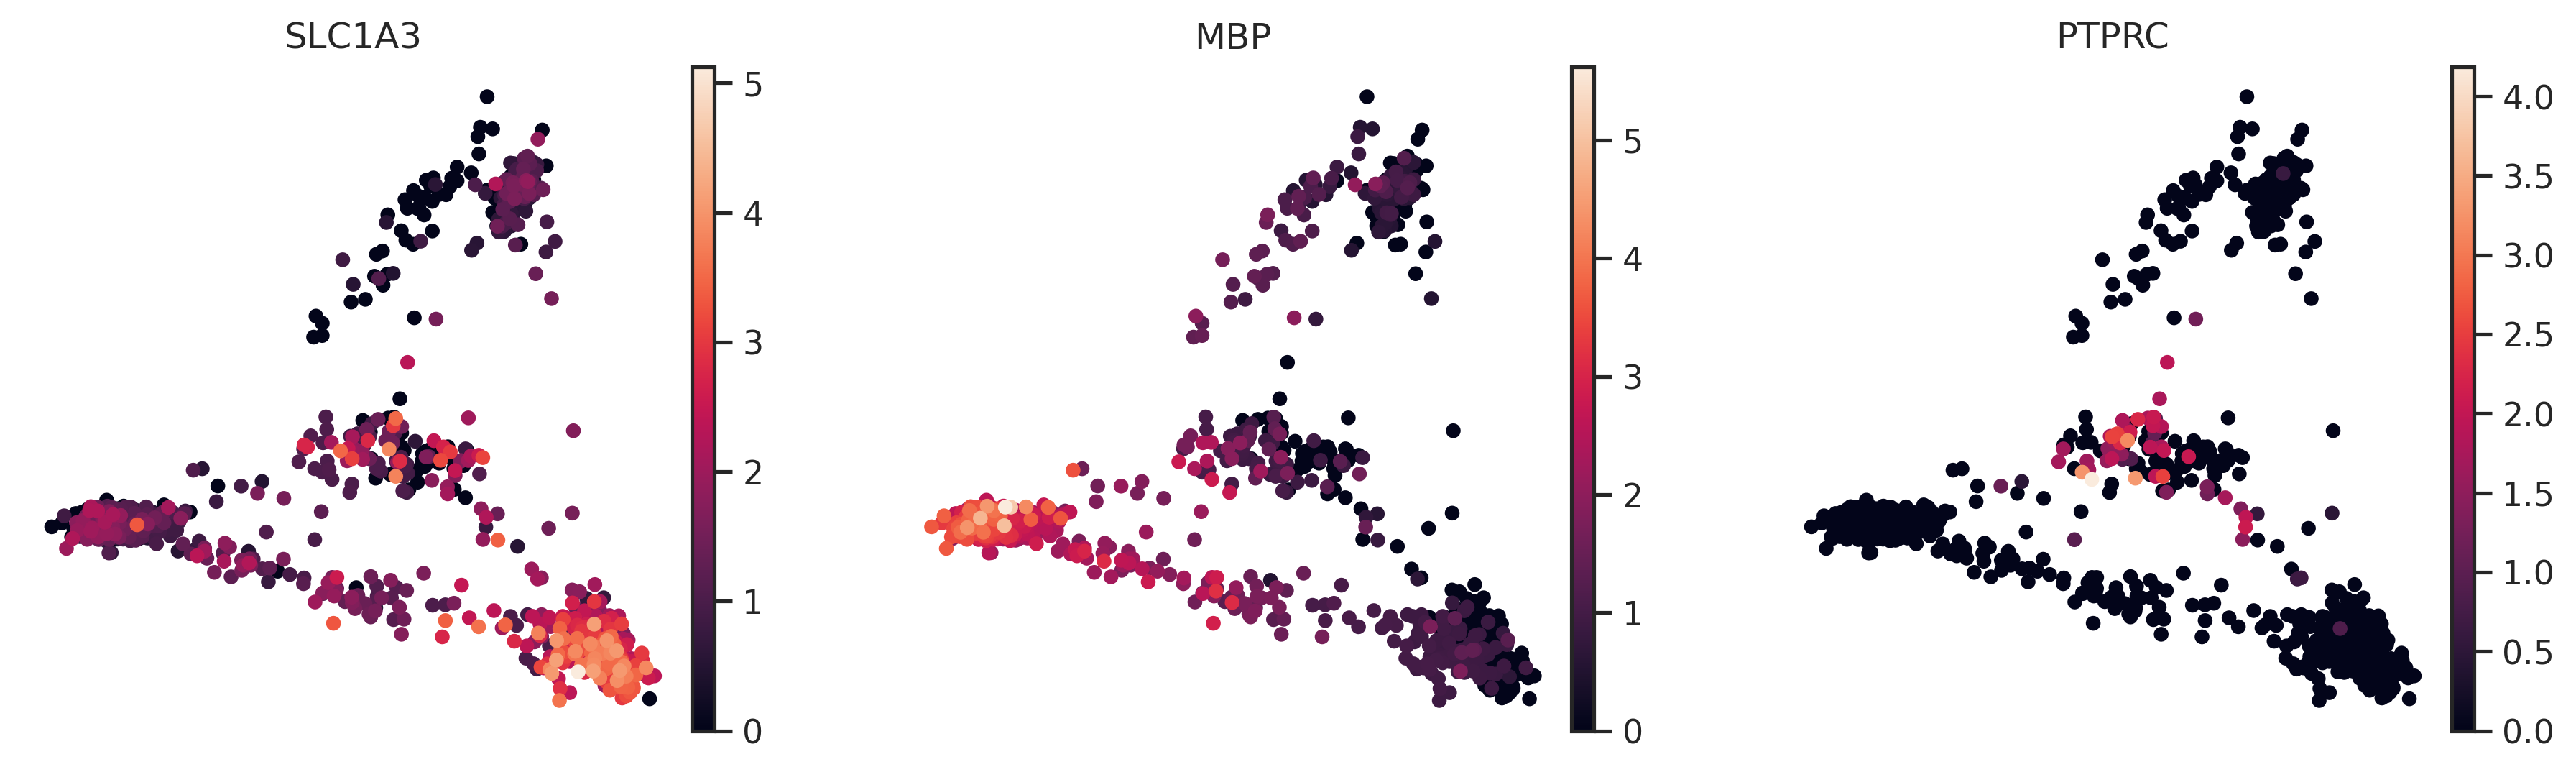

In [29]:
sc.pl.pca(adata, color=["SLC1A3", "MBP", "PTPRC"], frameon=False) # Отрисовываем PCA

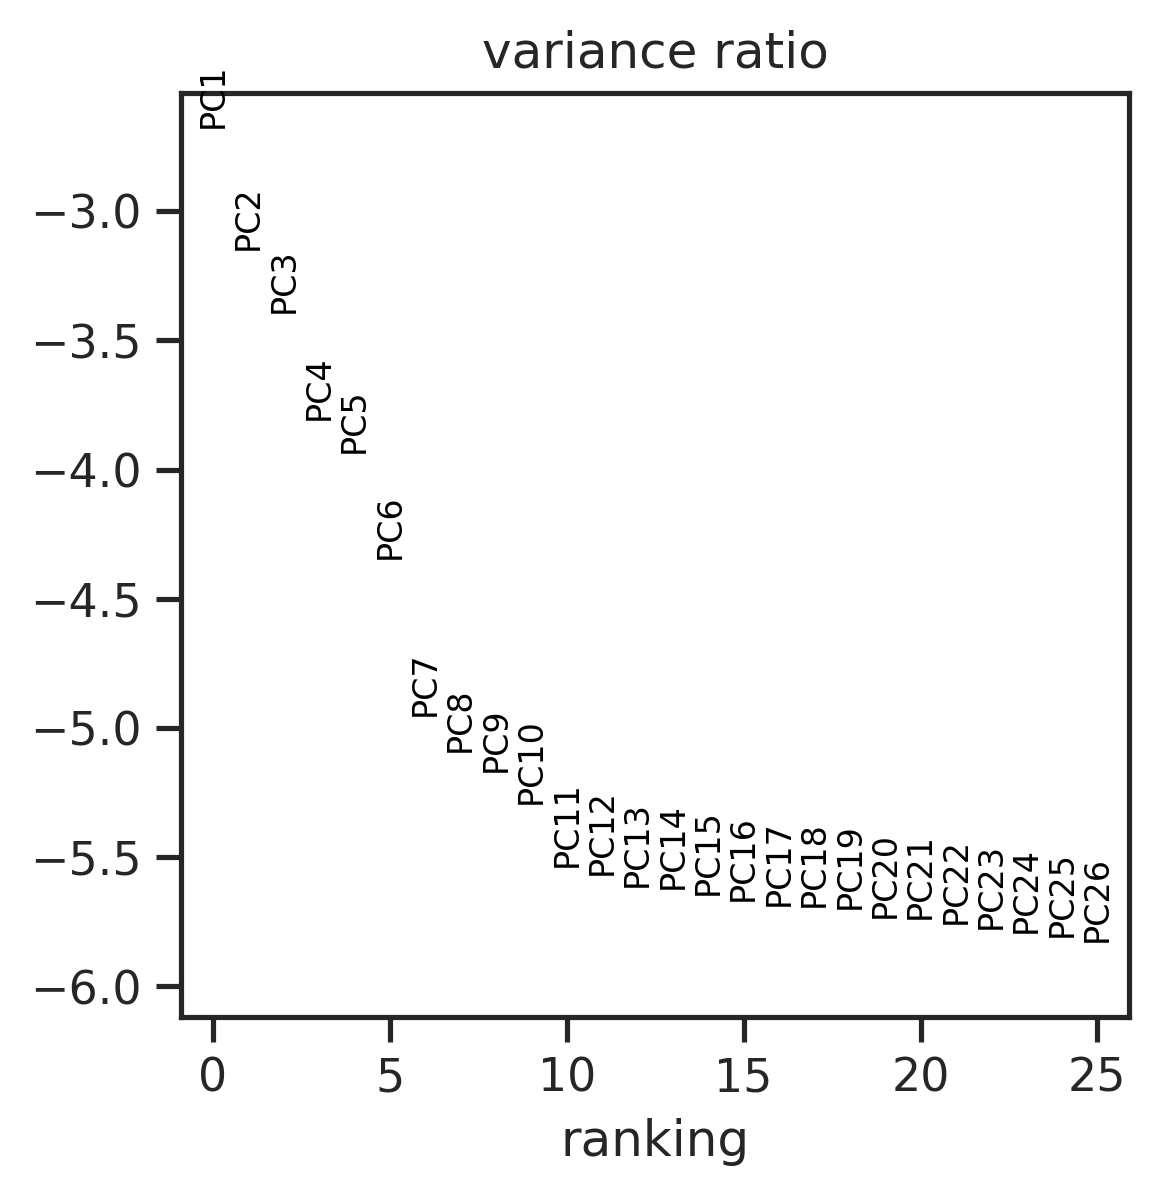

In [30]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=25)

In [ ]:
sc.pp.neighbors(adata, n_pcs=15, n_neighbors=20, use_rep='X_pca') # Вычисление графа соседей - это необходимая стадия перед UMAP и t-SNE
sc.tl.umap(adata, min_dist=0.5) # Рассчёт UMAP
sc.tl.tsne(adata, n_pcs=15) # Рассчёт t-SNE

<AxesSubplot: title={'center': 't-SNE'}, xlabel='tSNE1', ylabel='tSNE2'>

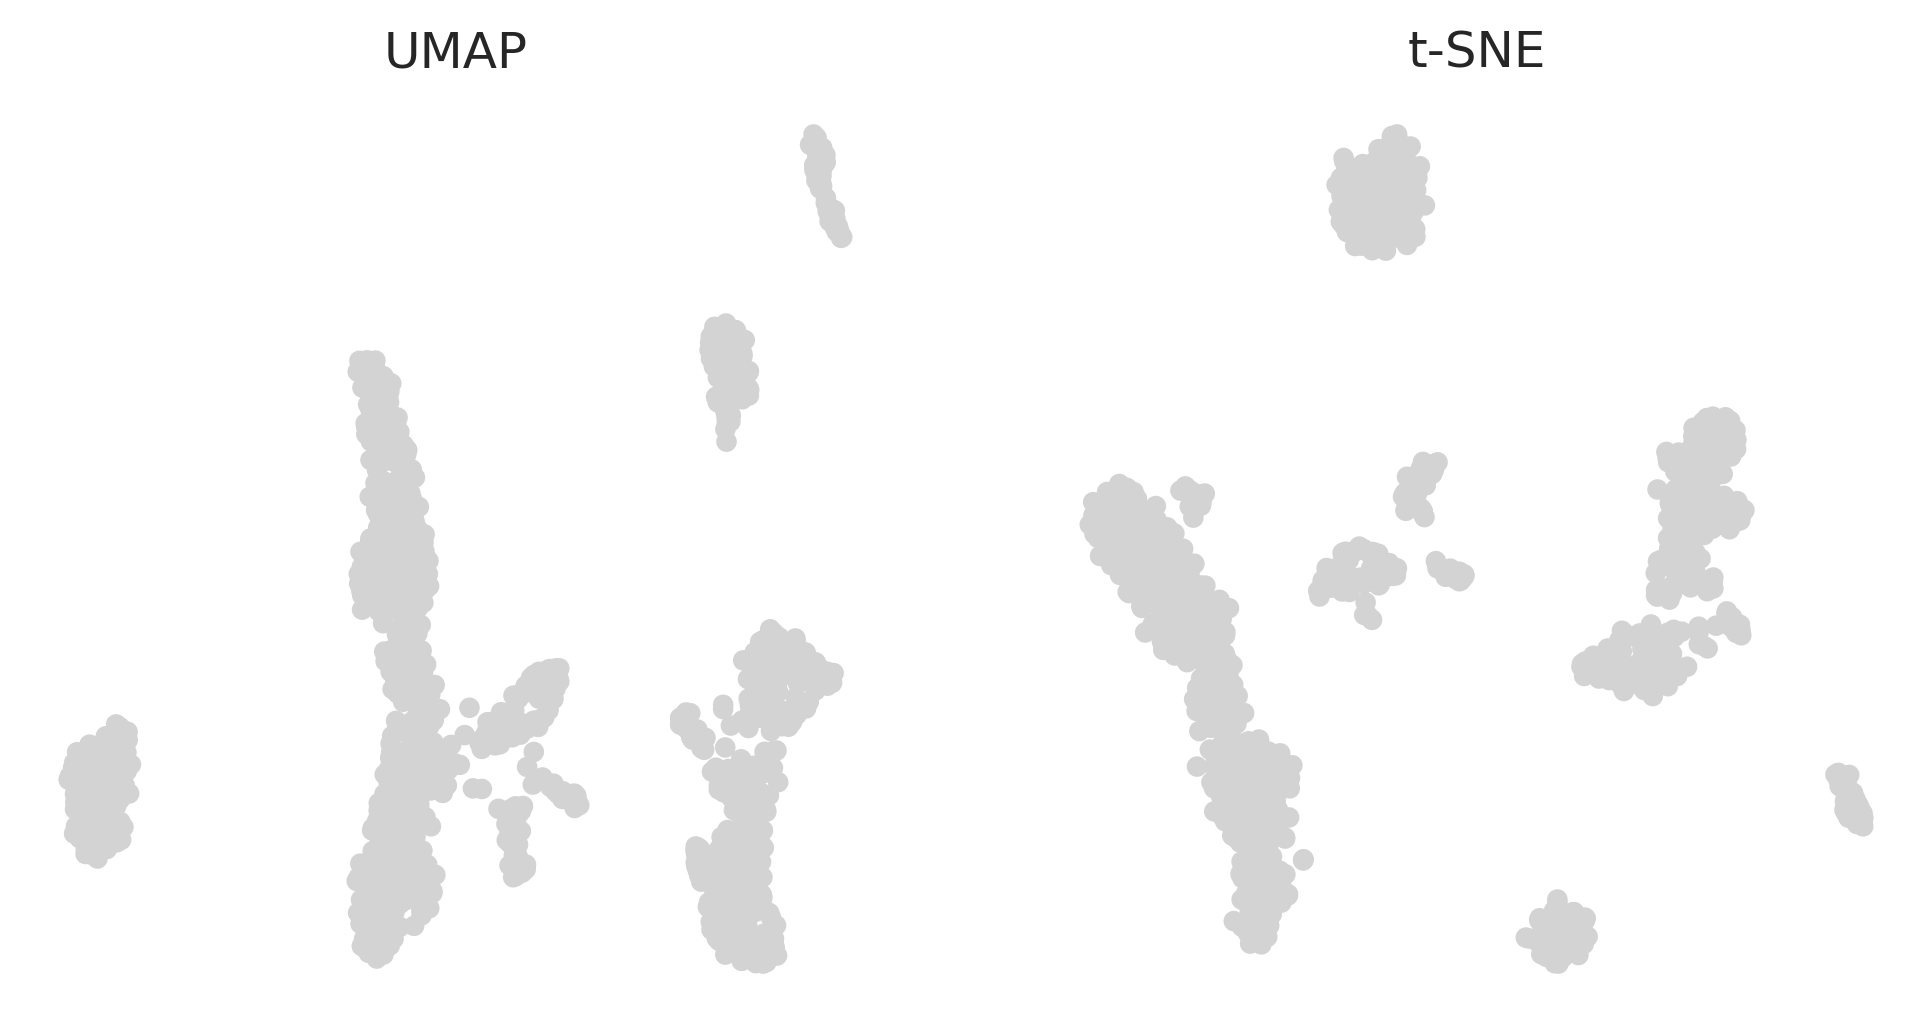

In [32]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))
sc.pl.umap(adata, frameon=False, ax=axs[0], title="UMAP", show=False) # Отрисовываем UMAP
sc.pl.tsne(adata, frameon=False, ax=axs[1], title="t-SNE", show=False) # Отрисовываем t-SNE

In [33]:
sc.tl.leiden(adata, resolution=0.08) # Кластеризация алгоритмом Leiden, с ограничением числа кластеров

running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


<AxesSubplot: title={'center': 't-SNE'}, xlabel='tSNE1', ylabel='tSNE2'>

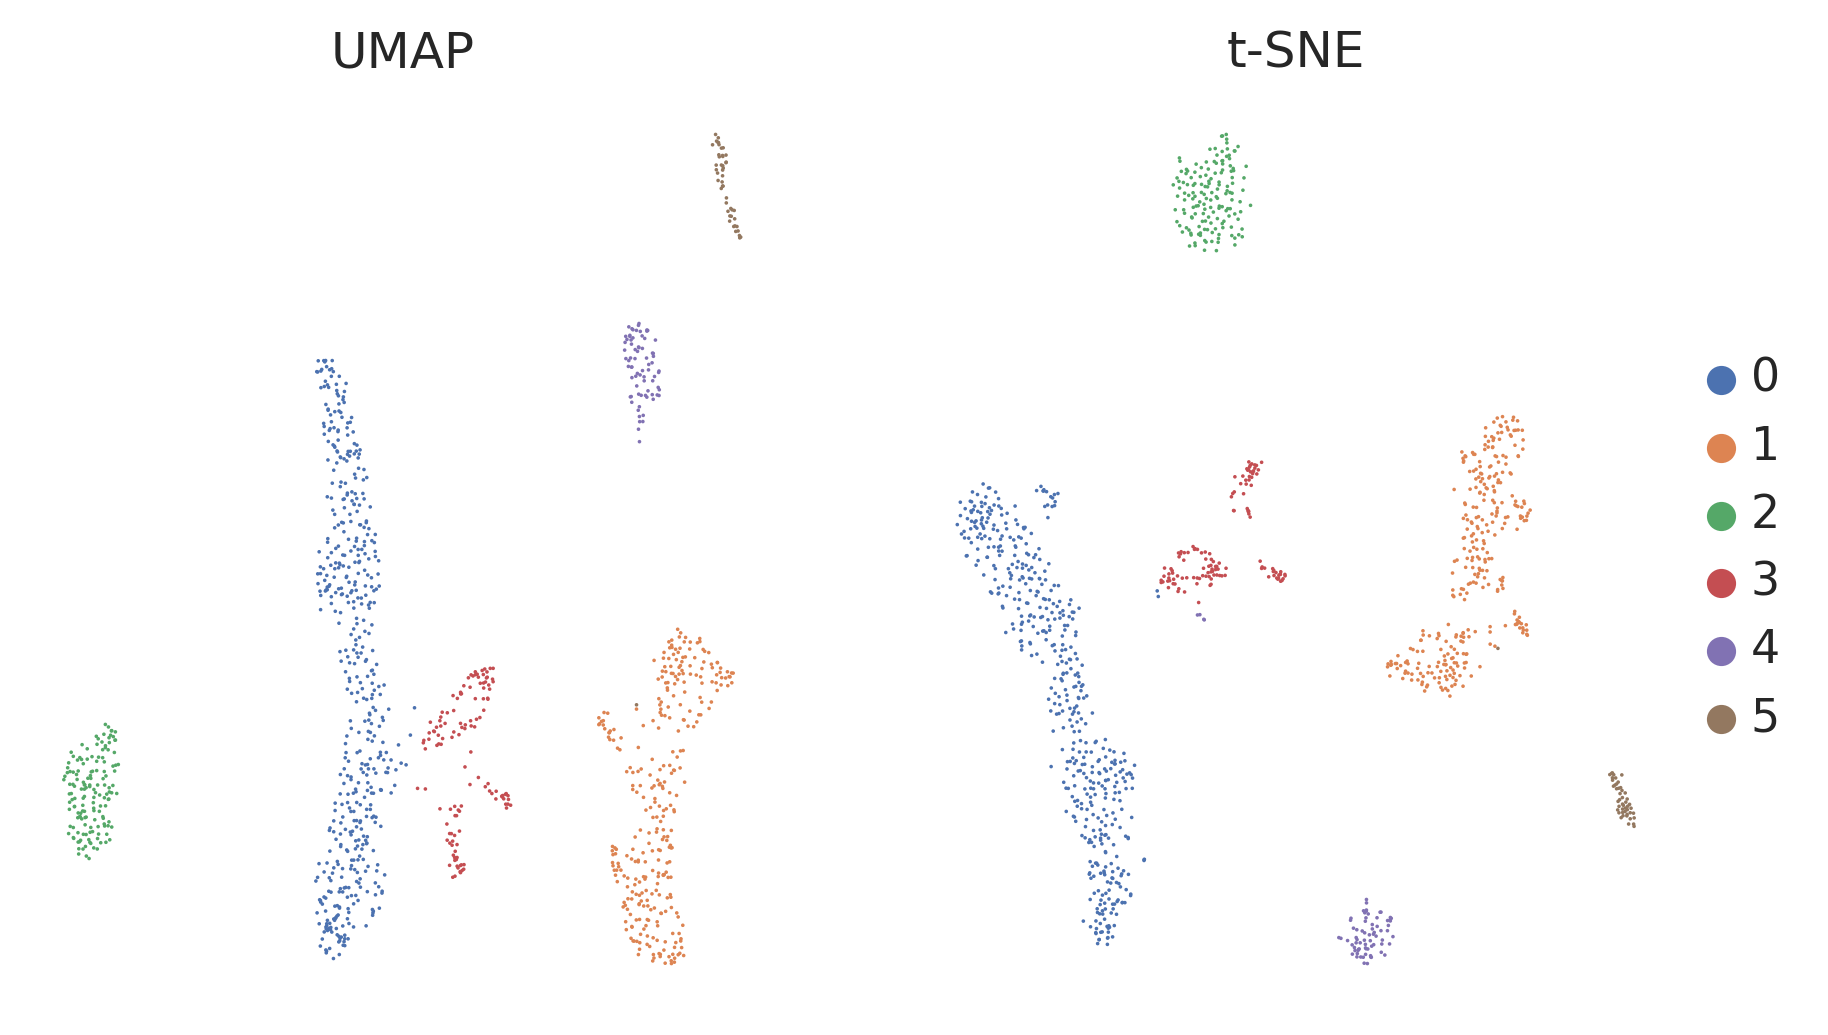

In [34]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(7, 4))
sc.pl.umap(adata, color="leiden", frameon=False, ax=axs[0], title="UMAP", show=False, legend_loc=None, s=3) # Отрисовываем UMAP
sc.pl.tsne(adata, color="leiden", frameon=False, ax=axs[1], title="t-SNE", show=False, s=3) # Отрисовываем t-SNE

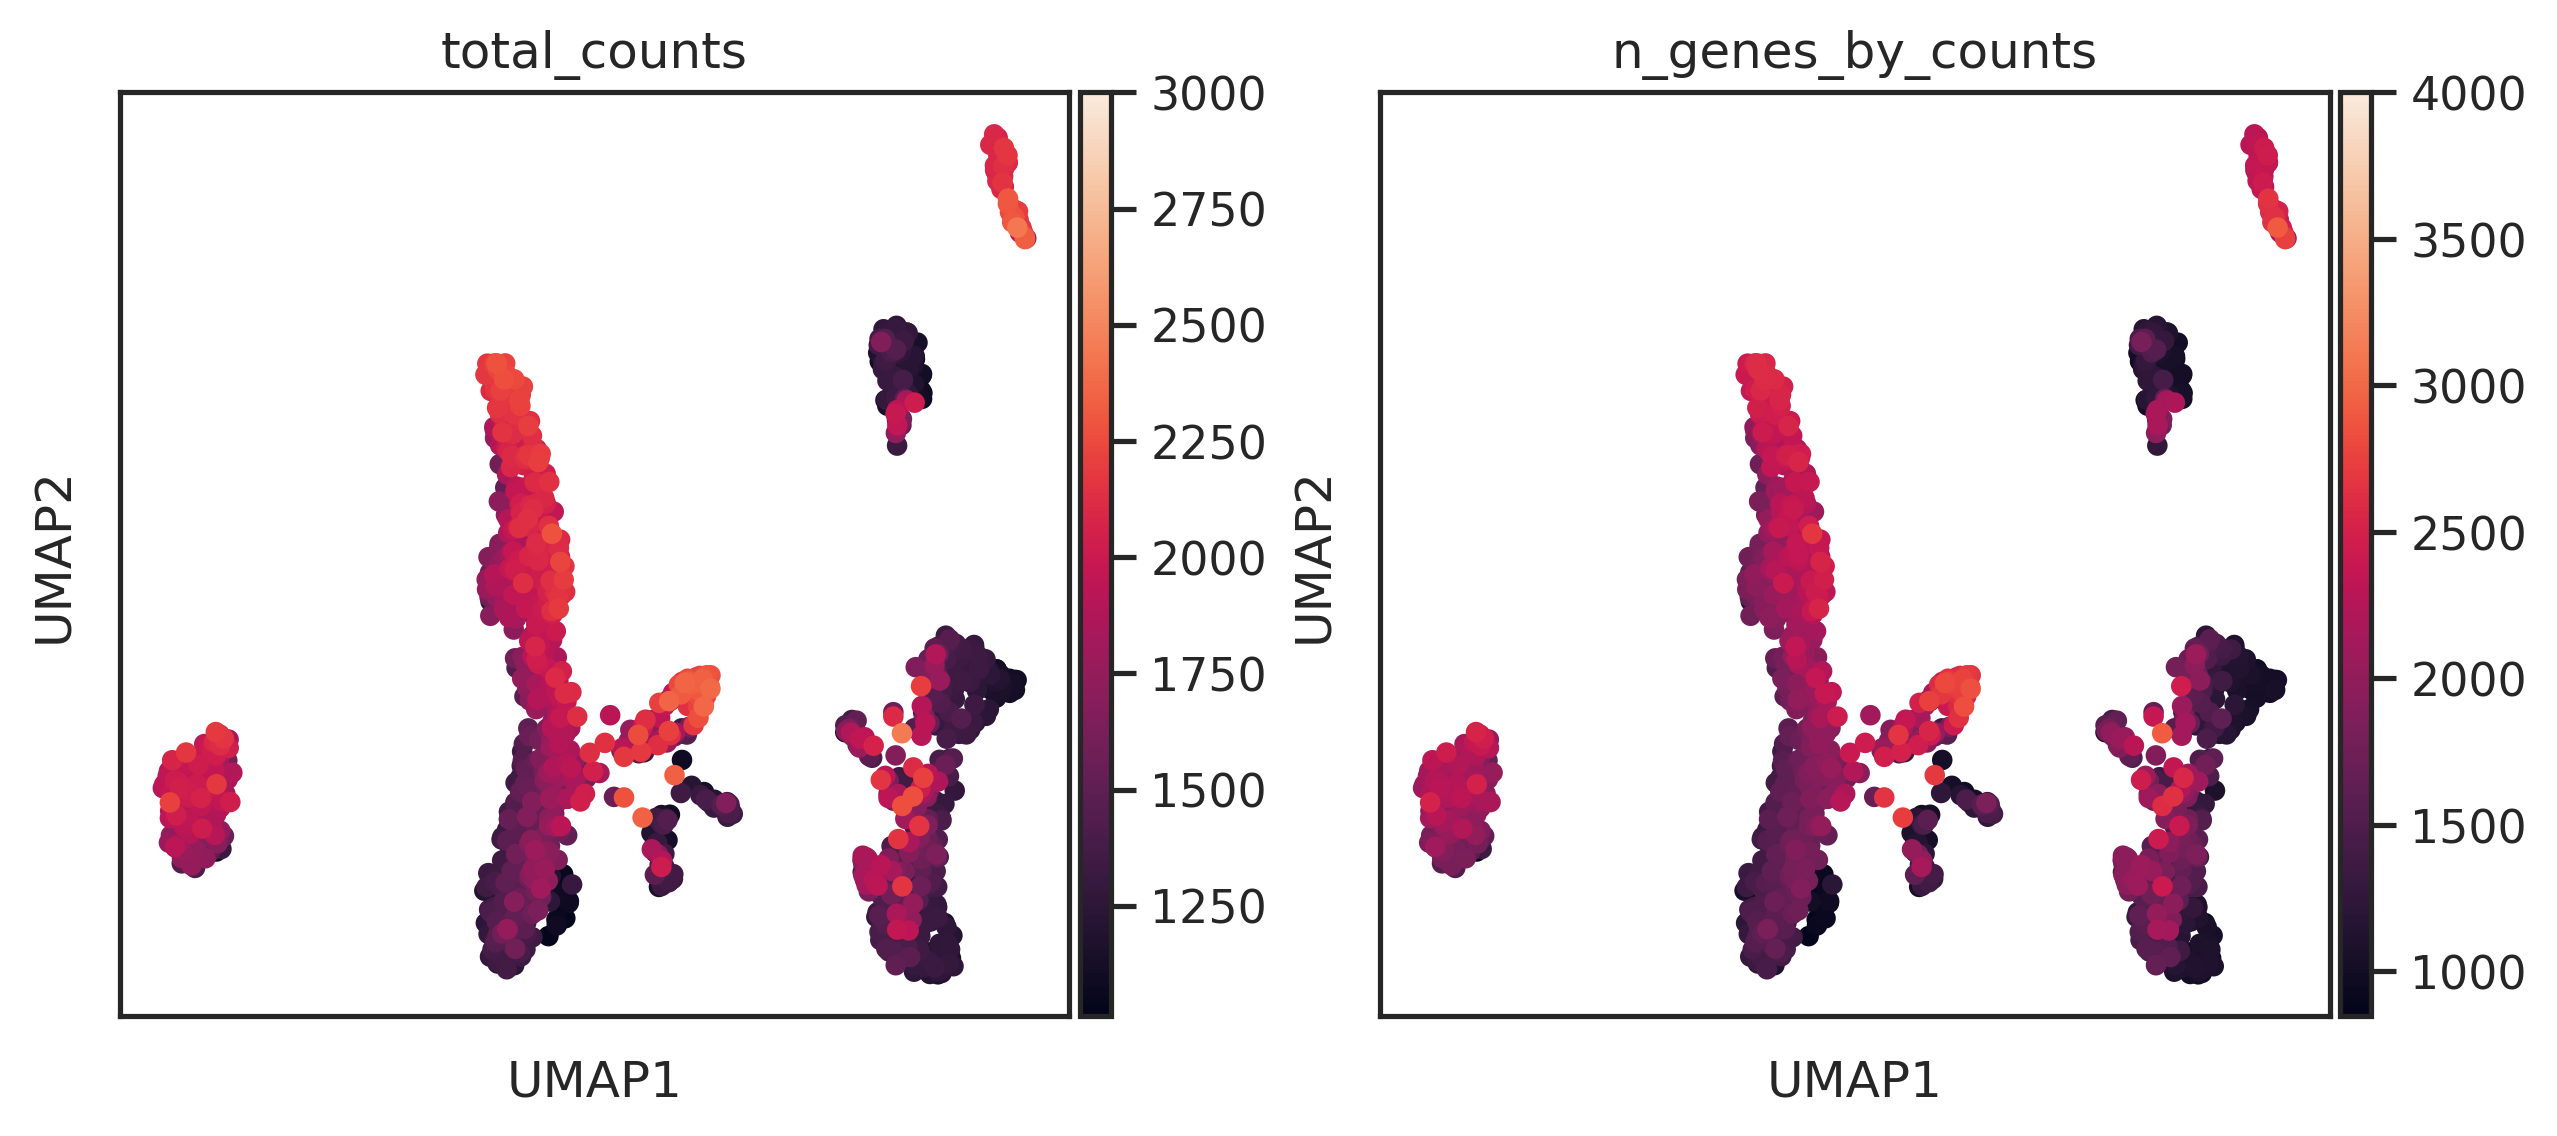

In [35]:
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts"], vmax=[3000, 4000])

### Определение популяций клеток

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


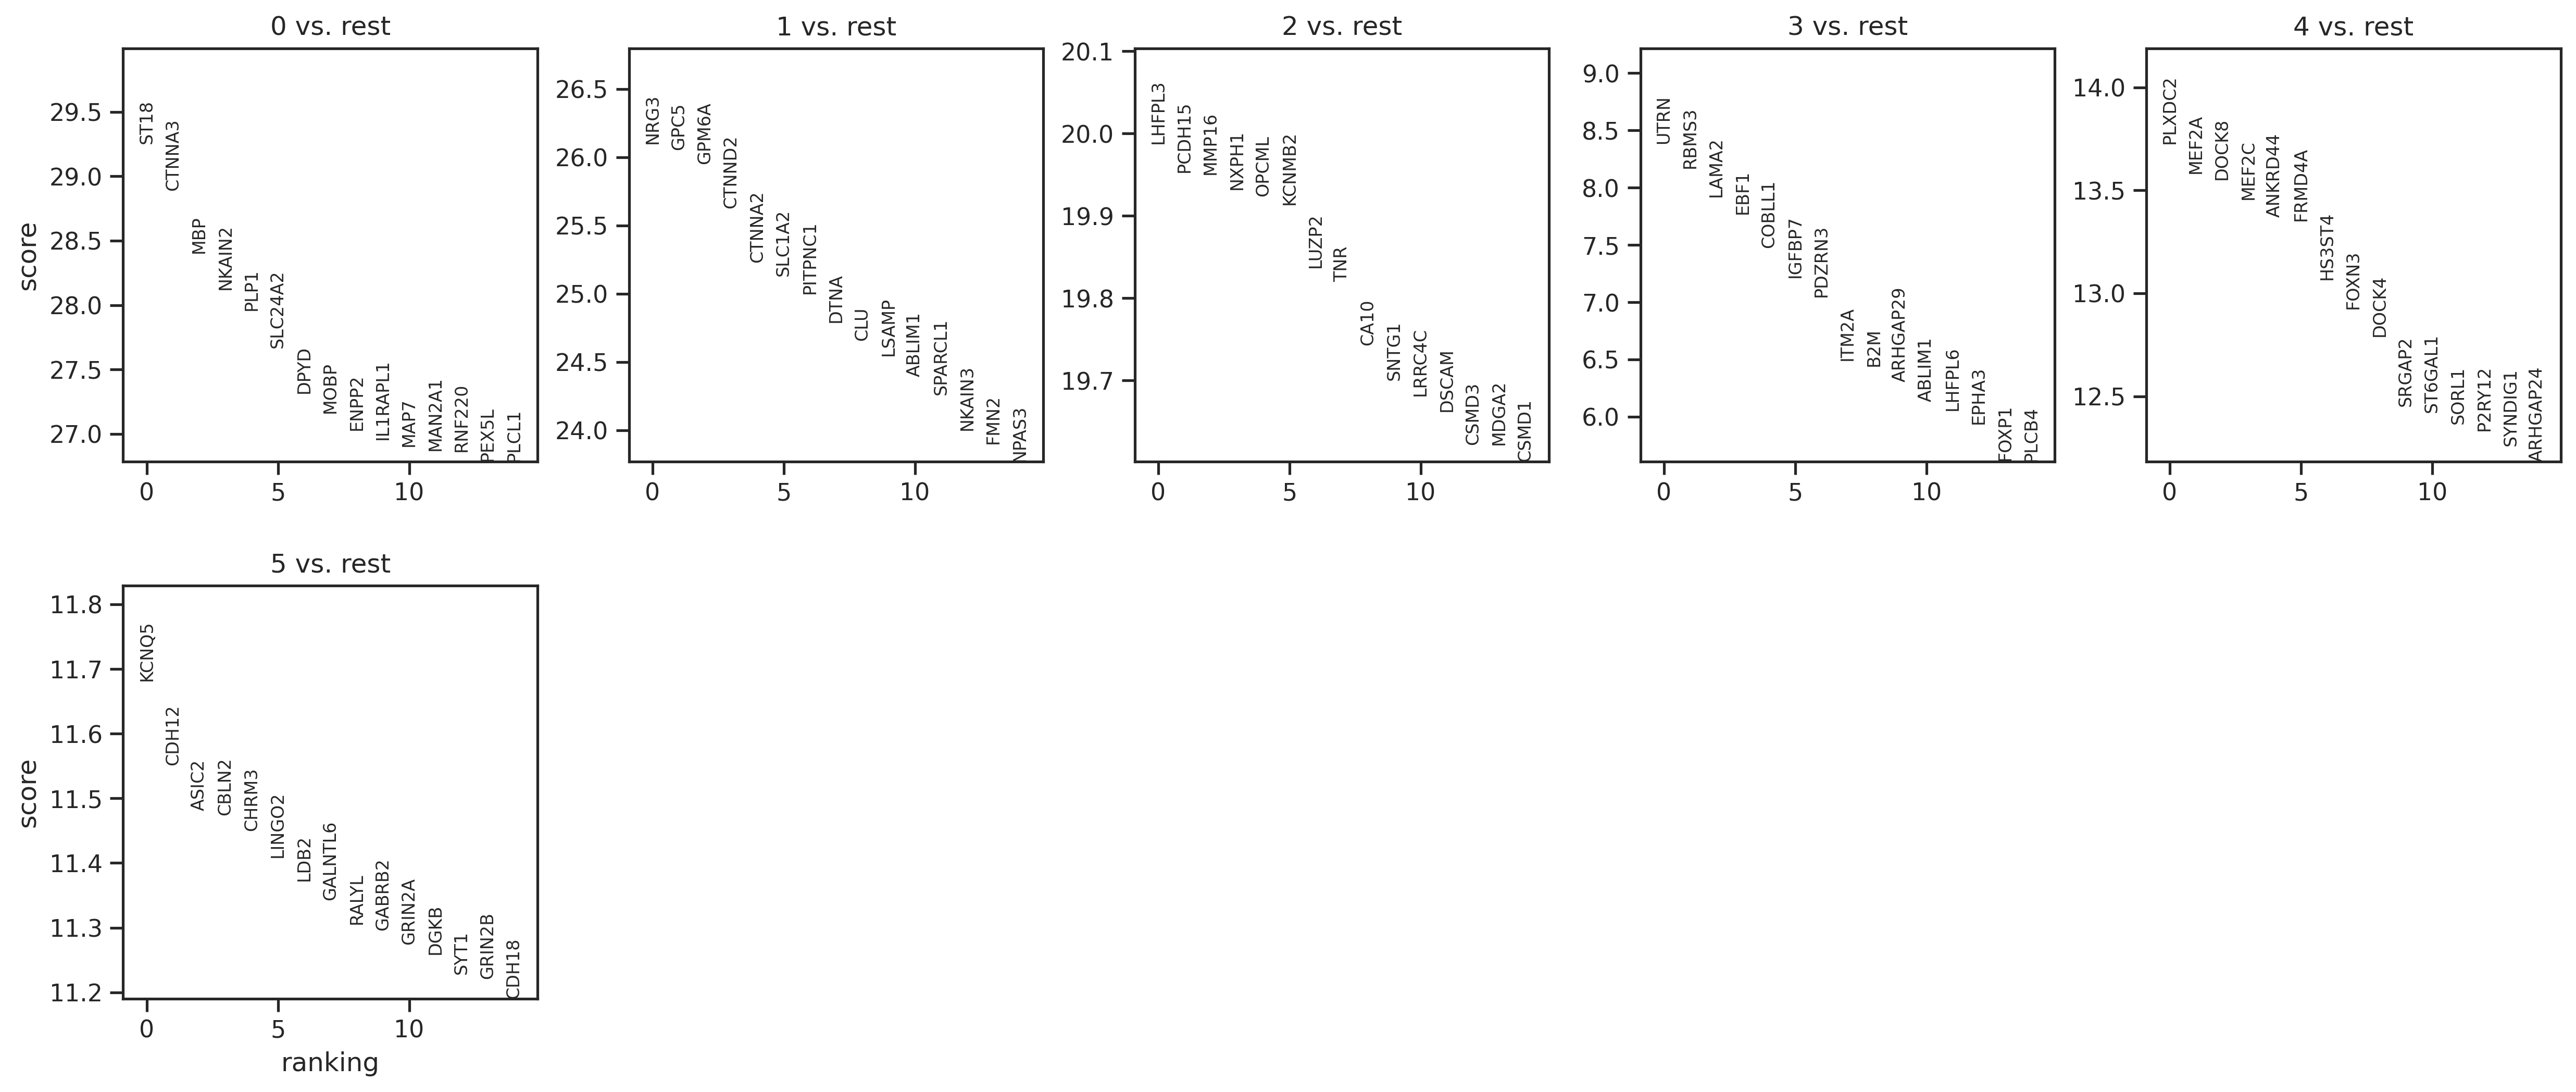

In [36]:
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon") # Вычисление маркерных генов
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False, ncols=5) # Список маркерных генов

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


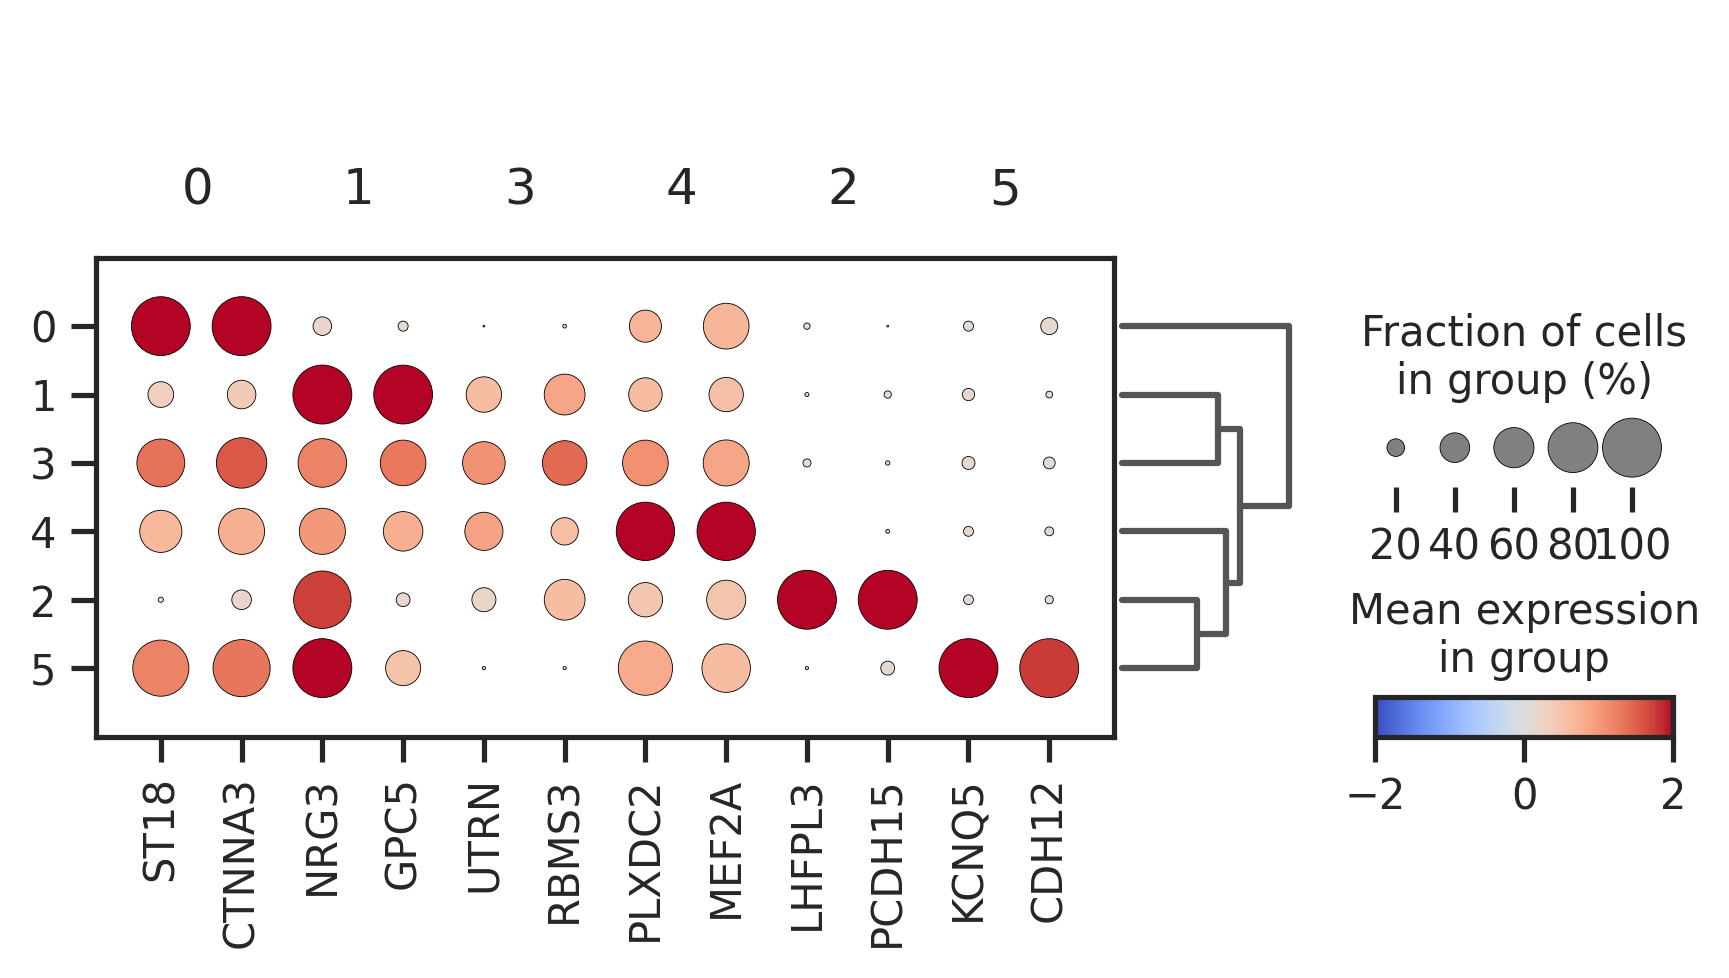

In [37]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    n_genes=2, 
    vmin=-2,
    vmax=2,
    cmap="coolwarm",
)

### Определение по известным маркерным генам

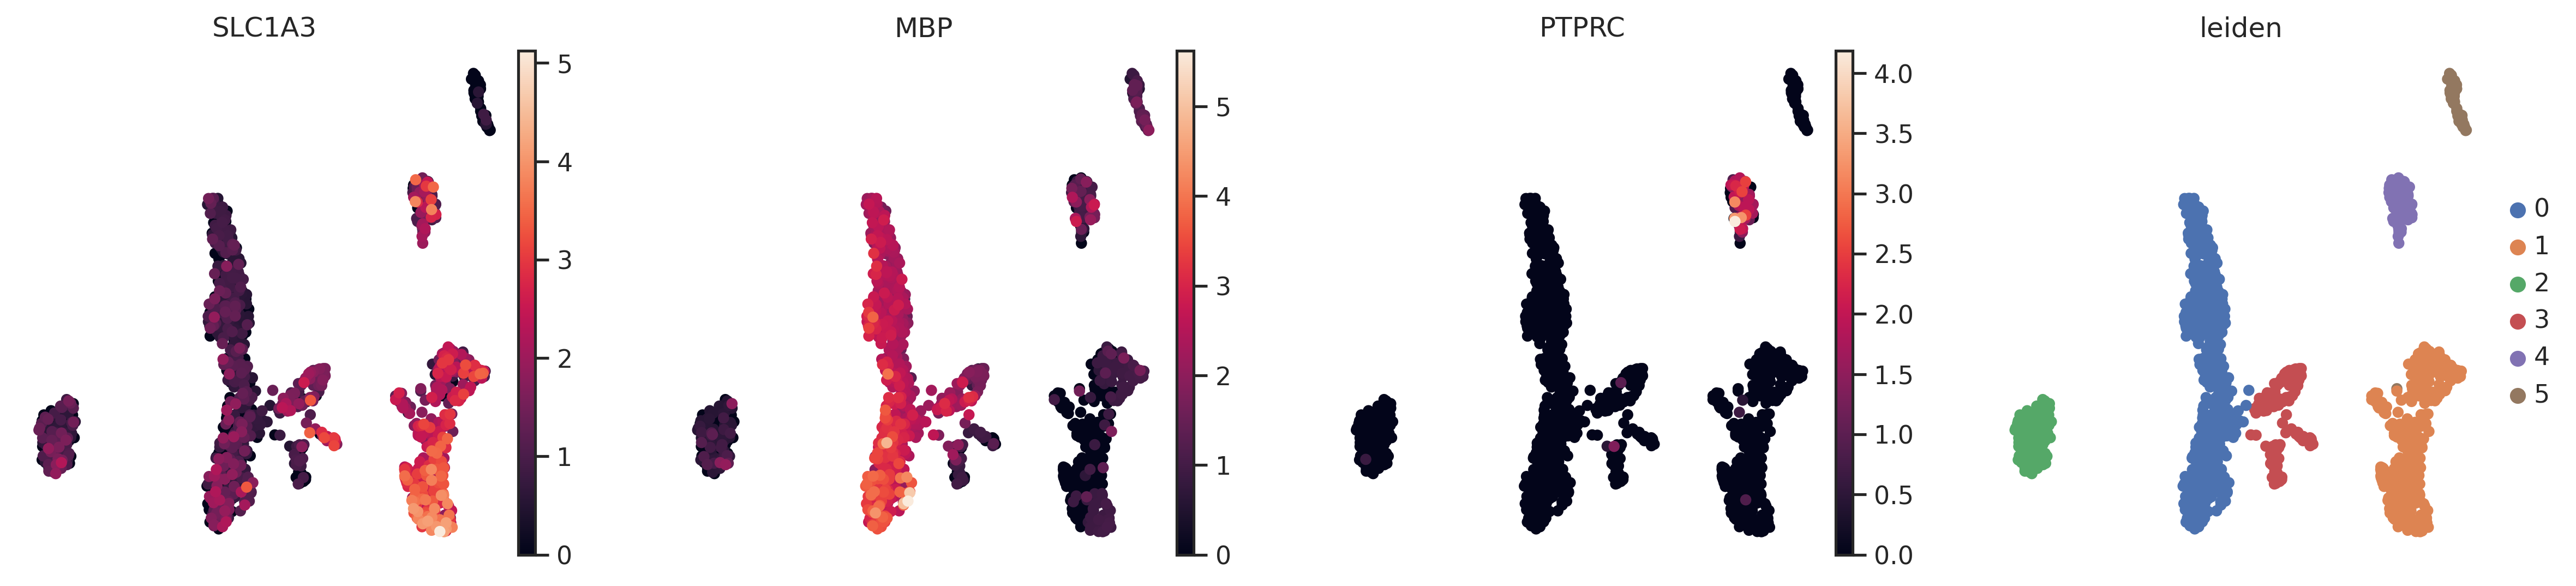

In [38]:
sc.pl.umap(adata, color=["SLC1A3", "MBP", "PTPRC", "leiden"], frameon=False)

Маркерные гены взяты из: 
* https://www.cellsignal.com/science-resources/neural-and-glial-markers
* https://www.cell.com/developmental-cell/fulltext/S1534-5807(11)00269-3
* https://www.abcam.com/neuroscience/oligodendrocyte-markers

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
categories: 0, 1, 2, etc.
var_group_labels: astrocytes, oligodendrocytes, oligodendrocyte precursor cells, etc.


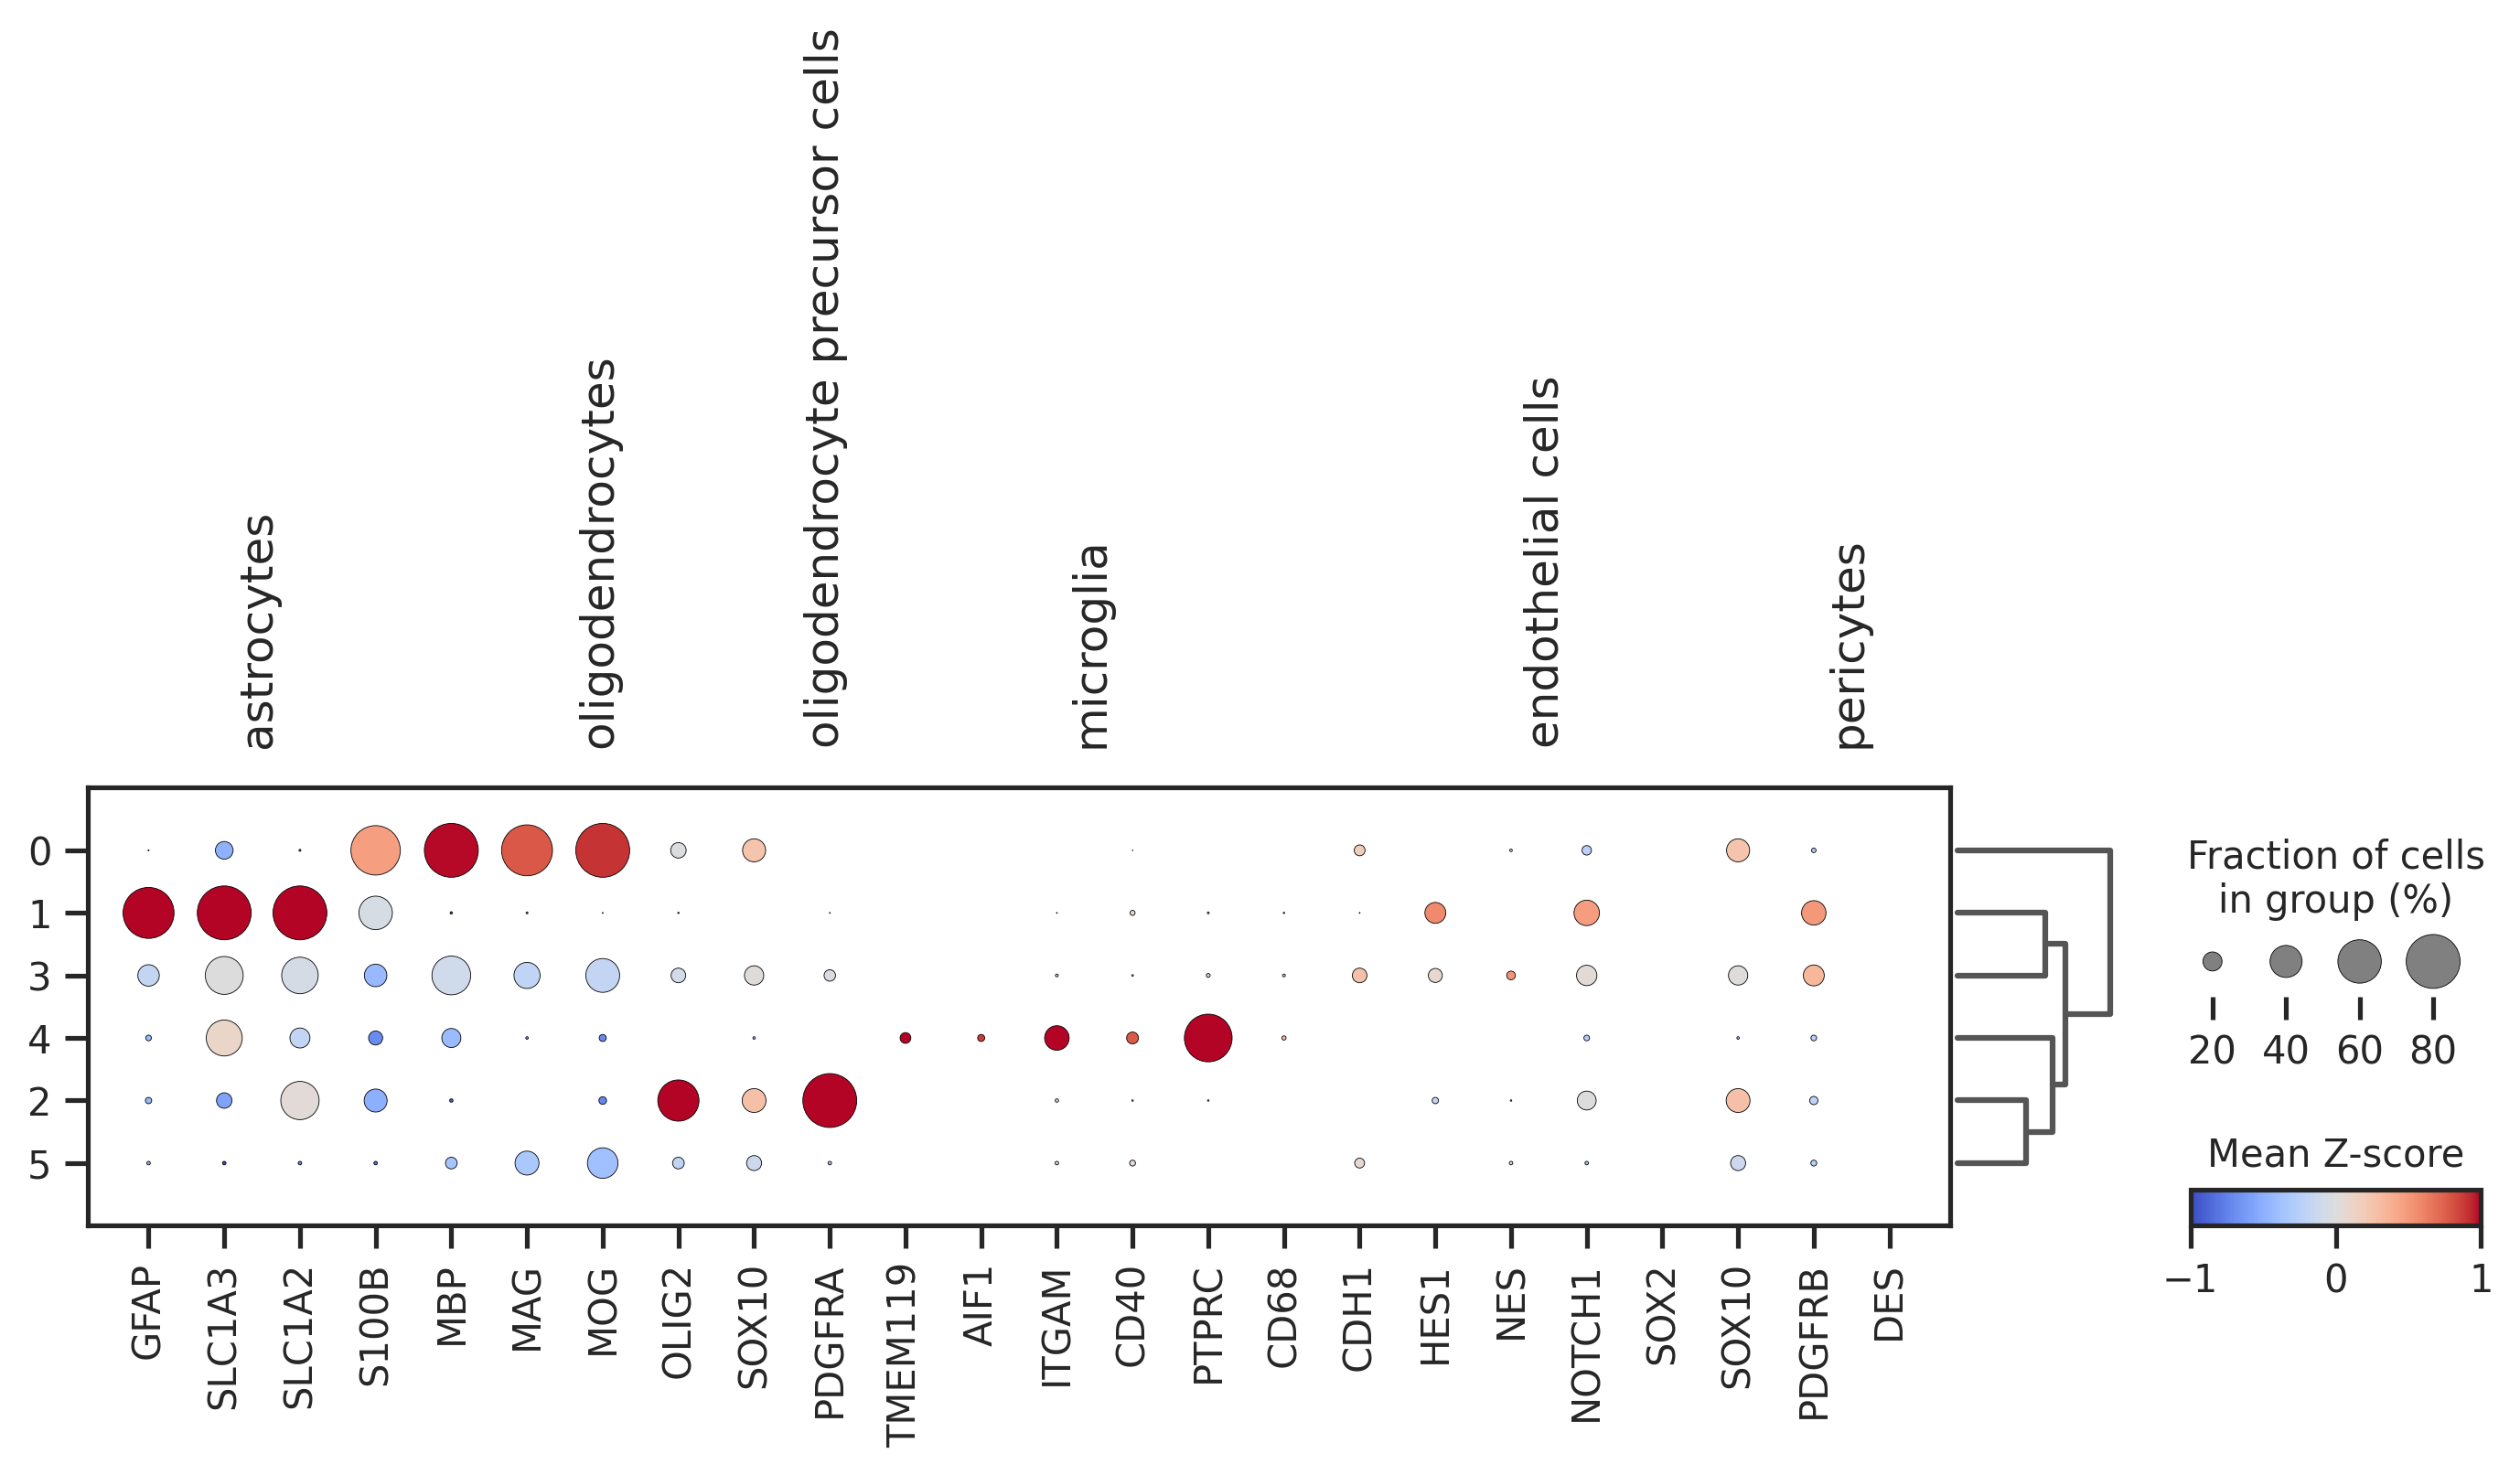

In [39]:
marker_genes_dict = {
    "astrocytes" : ["GFAP", "SLC1A3", "SLC1A2", "S100B"],
    "oligodendrocytes" : ["MBP", "MAG", "MOG", "OLIG2", "SOX10"],
    "oligodendrocyte precursor cells" : ["PDGFRA"],
    "microglia" : ["TMEM119", "AIF1", "ITGAM", "CD40", "PTPRC", "CD68"],
    "endothelial cells" : ["CDH1", "HES1", "NES", "NOTCH1", "SOX2", "SOX10"],
    "pericytes" : ["PDGFRB", "DES"]
} # Словарь с маркерными генами

adata_scaled = adata.raw.to_adata().copy() # Чтобы не отрисовывать экспрессии, можно их отшкалировать в отдельном объекте
adata_scaled.layers["scaled"] = sc.pp.scale(adata_scaled, copy=True).X # Z-скорируем экспрессии
sc.pl.dotplot(adata_scaled, marker_genes_dict, "leiden", layer="scaled", dendrogram=True,
              vmin=-1, vmax=1, cmap="coolwarm", colorbar_title="Mean Z-score", dot_max=0.8)

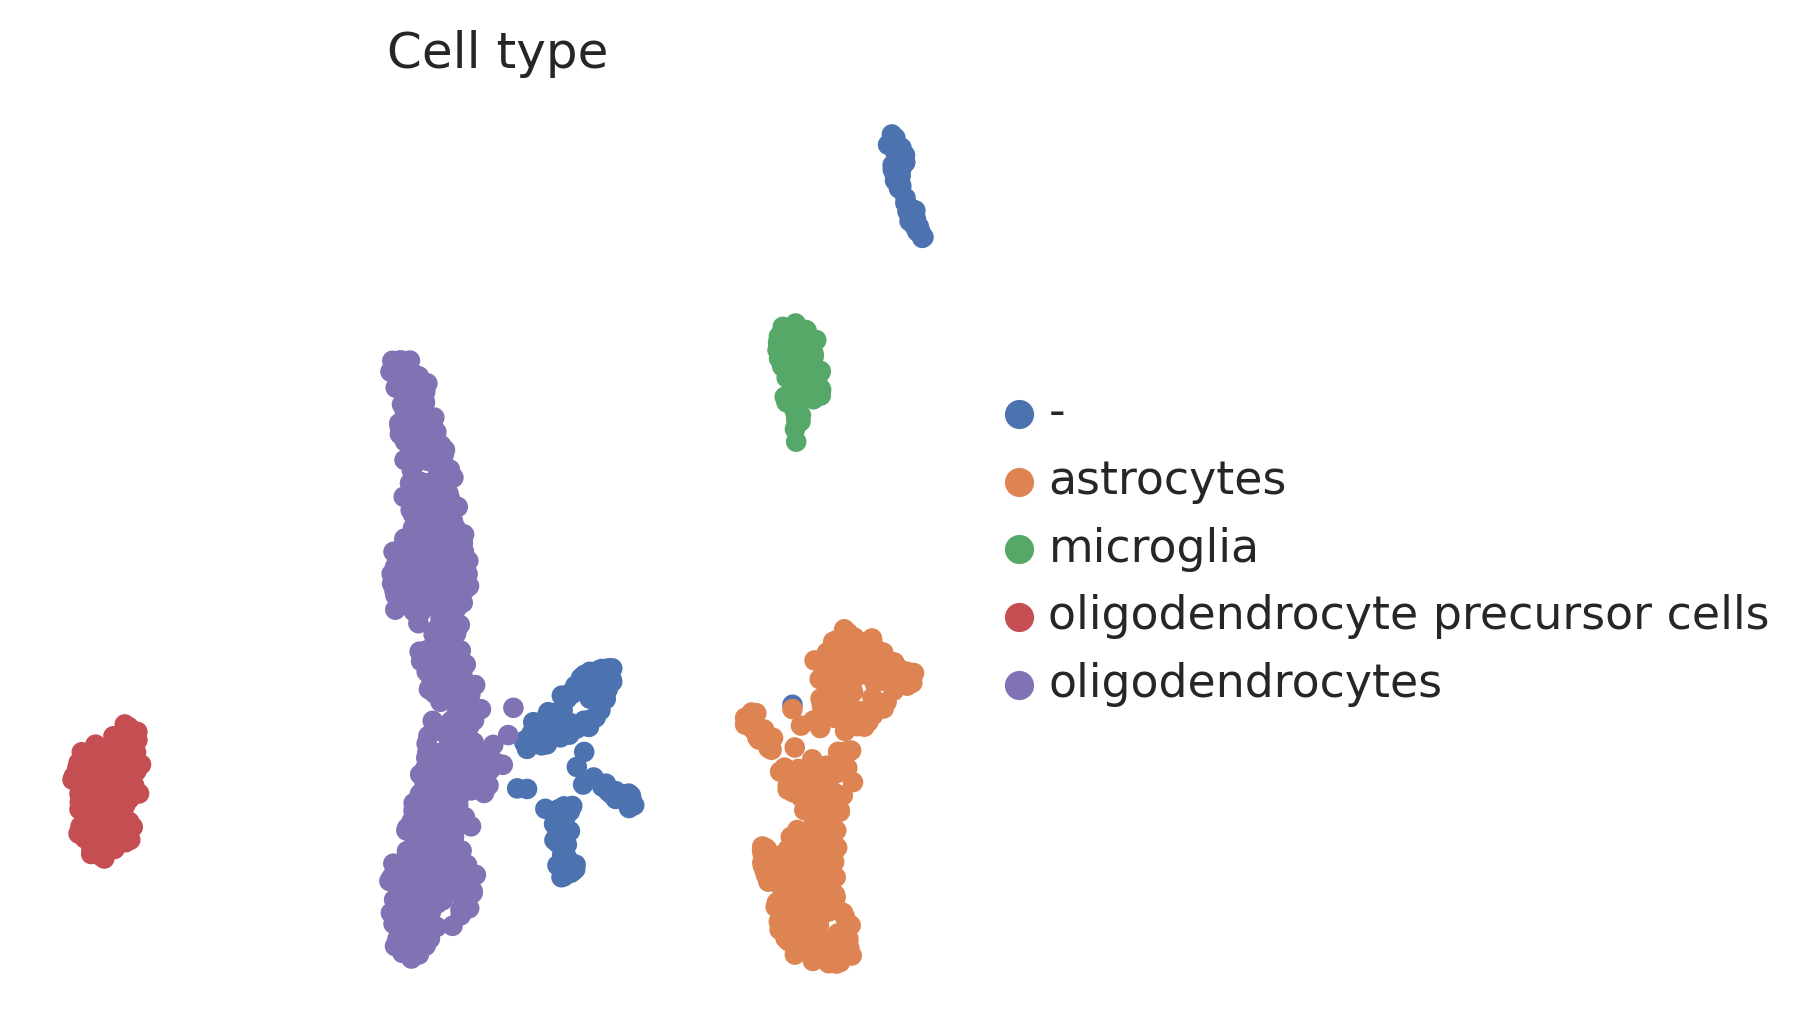

In [40]:
leiden_to_ct = {
    "0" : "oligodendrocytes",
    "1" : "astrocytes",
    "2" : "oligodendrocyte precursor cells",
    "3" : "-",
    "4" : "microglia",
    "5" : "-"
    # После того, как мы поняли, где какой тип клеток, можно создать вот такой вот словарь
}

adata.obs["my_cell_type"] = [leiden_to_ct[x] for x in adata.obs.leiden]
sc.pl.umap(adata, color="my_cell_type", frameon=False, title="Cell type")

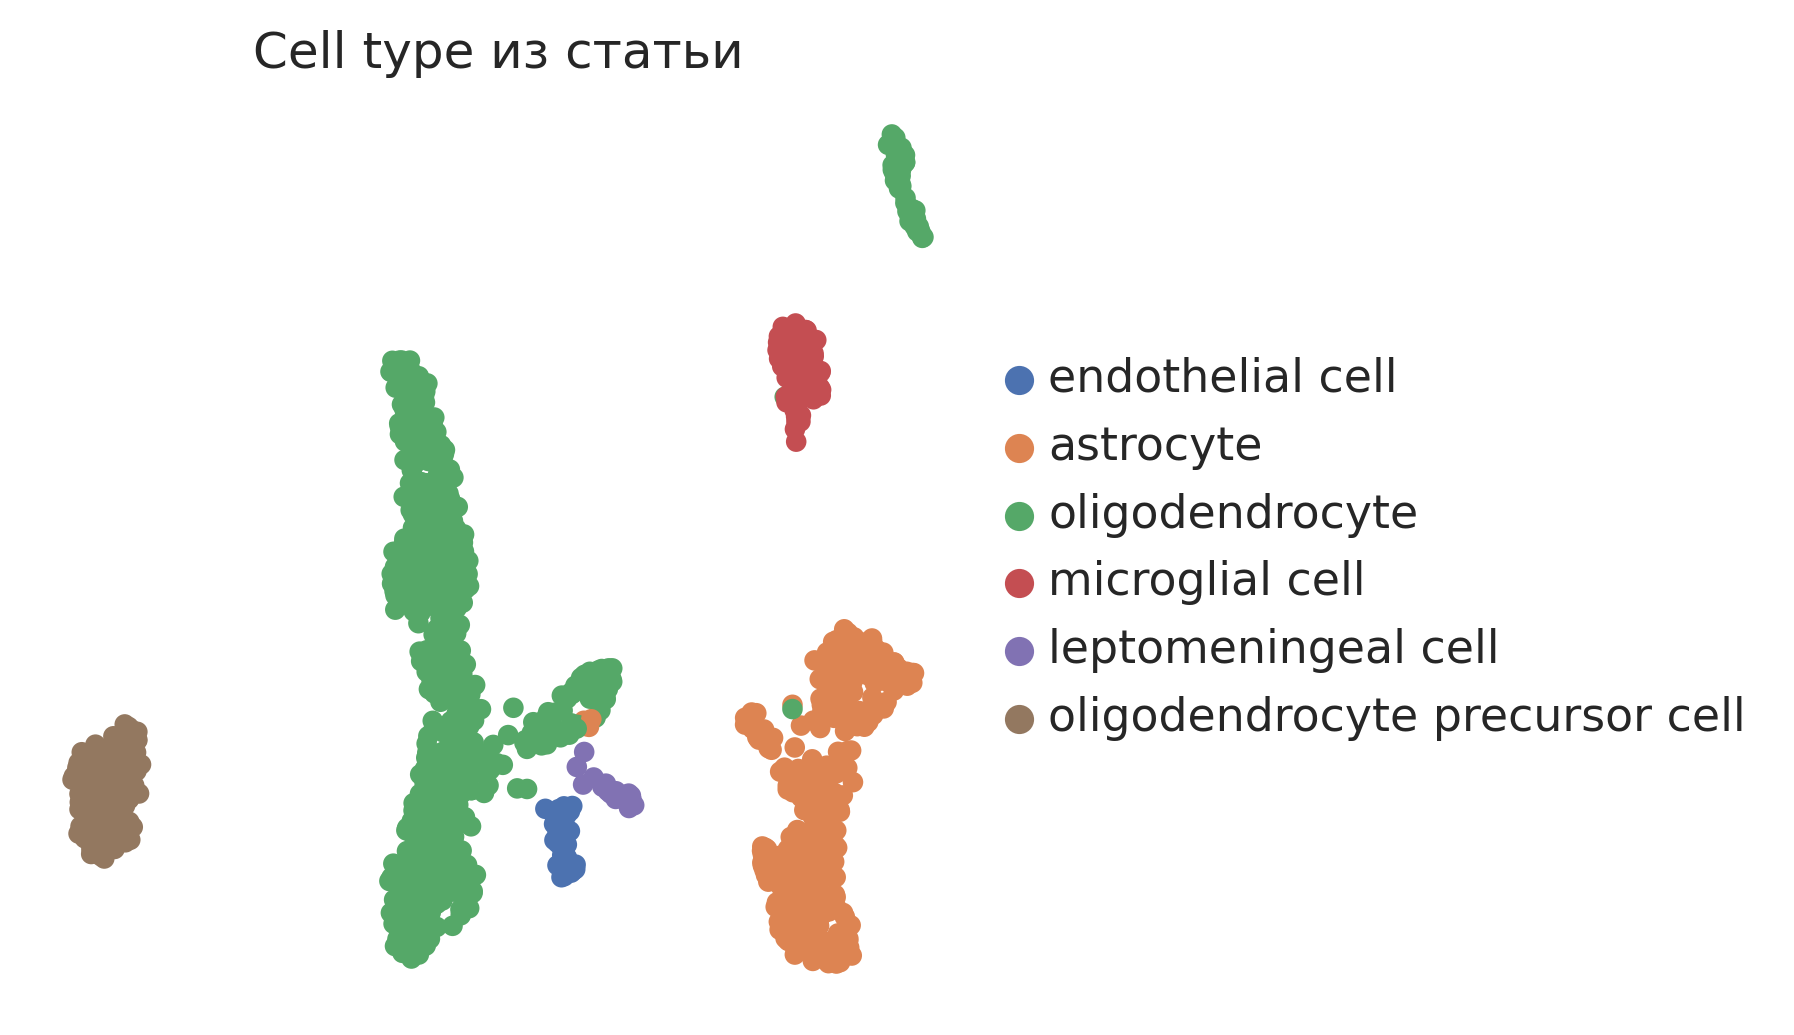

In [41]:
sc.pl.umap(adata, color="cell_type", frameon=False, title="Cell type из статьи")

Кластеры в целом совпадают с разделением по типам клеток из статьи. По маркерным генам получилось определить основные многочисленные типы клеток

# 1.4
Внимательно прочитайте статью группы Фабиана Тэиса с
бенчмаркингом методов батч-коррекции. Какую метрику они используют для
того, чтобы оценить качество интеграции? Воспользуйтесь той же метрикой
(или теми же метриками, если их несколько) для того, чтобы оценить качество
процессинга ваших данных при помощи метода log1pPF (в вашем случае мы
будем использовать эту метрику для оценки качества процессинга, а не
интеграции!).

Luecken, M.D., Büttner, M., Chaichoompu, K. et al. Benchmarking atlas-level data integration in single-cell genomics. Nat Methods 19, 41–50 (2022). https://doi.org/10.1038/s41592-021-01336-8

In [ ]:
!pip install scib
import scib

### Adjusted Rand Index
The adjusted rand index is a chance-adjusted rand index, which evaluates the pair-wise accuracy of clustering vs. ground truth label assignments. The score ranges between 0 and 1 with larger values indicating better conservation of the data-driven cell identity discovery after integration compared to annotated labels.
### Normalized mutual information
The normalized mutual information is a version of the mutual information corrected by the entropy of clustering and ground truth labels (e.g. cell type). The score ranges between 0 and 1, with 0 representing no sharing and 1 representing perfect sharing of information between clustering and annotated cell labels.

In [ ]:
aris = []
nmis = []

for i in np.linspace(0.1,2,20):
  sc.tl.leiden(adata, resolution=i) # Кластеризация алгоритмом Leiden, с ограничением числа кластеров
  ari = scib.metrics.ari(adata, cluster_key='leiden', label_key='cell_type')
  nmi = scib.metrics.nmi(adata, cluster_key='leiden', label_key='cell_type')
  aris.append(ari)
  nmis.append(nmi)

In [44]:
print('ARI:',max(aris))
print('NMI:',max(nmis))

ARI: 0.788336283021602
NMI: 0.834282446958671


# 1.5
Модифицируйте пайплайн анализа, исключая из него
различные стадии (например, не логарифмируйте экспрессии, не делайте PCA
— попробуйте перебрать различные комбинации, которые только прийдут вам
в голову). В случае какого процессинга ваша метрика (или ваши метрики)
выдают наиболее высокое значение? Какие выводы вы можете сделать из
этого?


### Без нормировки

In [ ]:
# Возвращаем adata к исходному виду
adata = adata_before_log1p.copy()

# Устранение дуплетов
sce.pp.scrublet(adata)
adata = adata[~adata.obs.predicted_doublet]

# Контроль за дисперсией
adata.layers["counts"] = adata.X.copy() # Сохраняем в слой counts значения сырых каунтов

# Подготовка к кластеризации и снижению размерности
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000,
    layer="counts",
    flavor="seurat_v3",
) # Выделяем высоко вариабельные гены (HVG)
adata.raw = adata # Сохраняем изначальные значения экспрессий
adata = adata[:, adata.var.highly_variable] # Оставляем только подмножество генов, которые относятся к HVG
sc.pp.scale(adata) # Шкалирование

# Снижение размерности и кластеризация
sc.tl.pca(adata) # Вычисляем PCA
sc.pp.neighbors(adata, n_pcs=15, n_neighbors=20, use_rep='X_pca') # Вычисление графа соседей

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


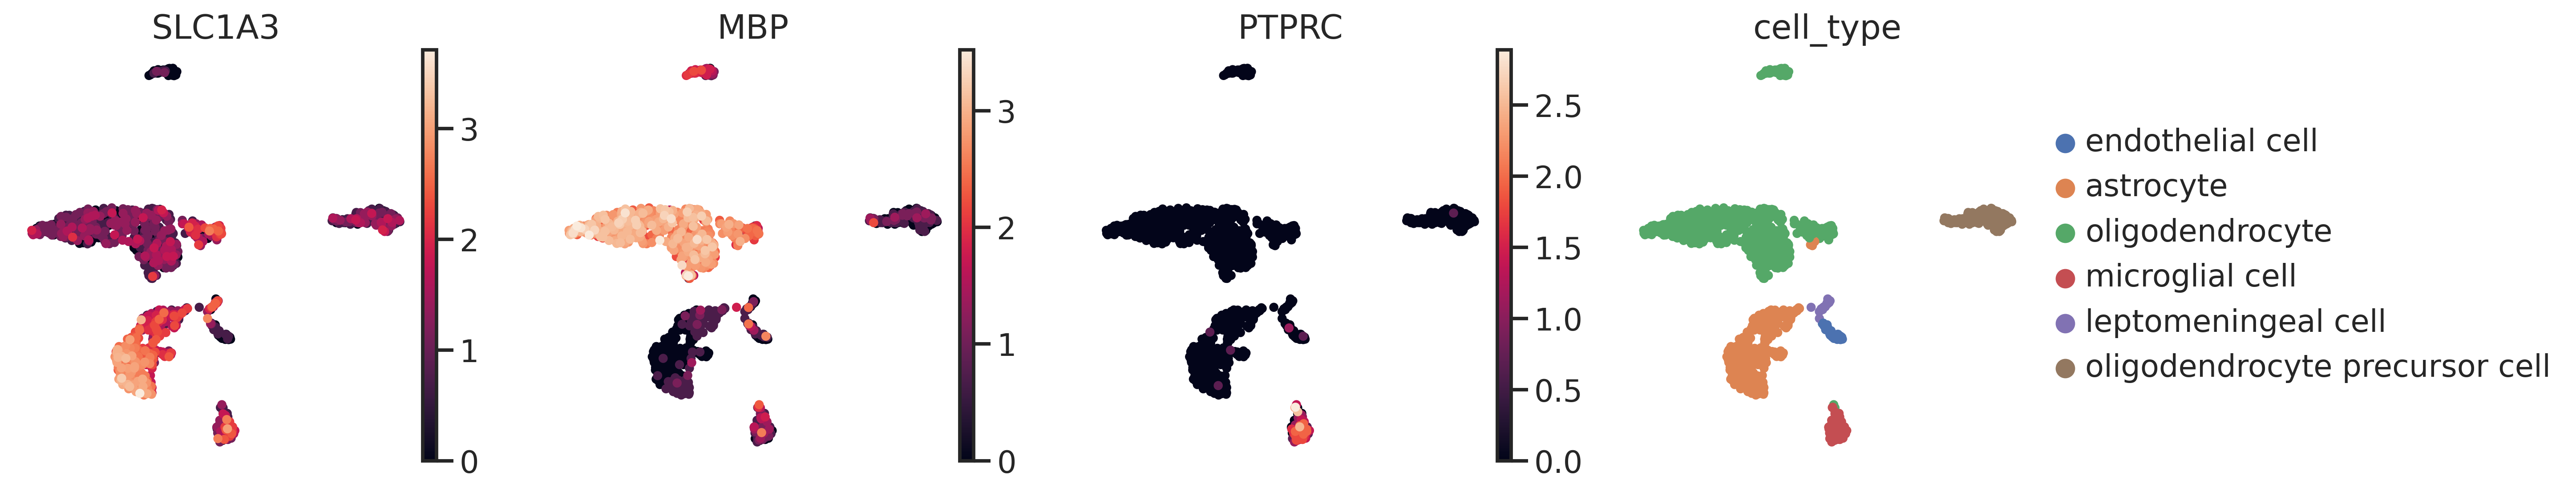

In [46]:
# Отрисовываем получившиеся кластеры (не влияет на значение метрик)
sc.tl.umap(adata, min_dist=0.5) # Рассчёт UMAP
sc.tl.leiden(adata, resolution=0.07) # Кластеризация алгоритмом Leiden, с ограничением числа кластеров
sc.pl.umap(adata, color=["SLC1A3", "MBP", "PTPRC", "cell_type"], frameon=False) # Красим по известным маркерным генам и типам клеток из статьи

In [ ]:
# ARI & NMI
aris = []
nmis = []

for i in np.linspace(0.1,2,20):
  sc.tl.leiden(adata, resolution=i) # Кластеризация алгоритмом Leiden, с ограничением числа кластеров
  ari = scib.metrics.ari(adata, cluster_key='leiden', label_key='cell_type')
  nmi = scib.metrics.nmi(adata, cluster_key='leiden', label_key='cell_type')
  aris.append(ari)
  nmis.append(nmi)

In [48]:
print('ARI:',max(aris))
print('NMI:',max(nmis))

ARI: 0.629905450757667
NMI: 0.8153673923091308


### Без отсечки по высоковариабельным генам

In [ ]:
# Возвращаем adata к исходному виду
adata = adata_before_log1p.copy()

# Устранение дуплетов
sce.pp.scrublet(adata)
adata = adata[~adata.obs.predicted_doublet]

# Контроль за дисперсией
adata.layers["counts"] = adata.X.copy() # Сохраняем в слой counts значения сырых каунтов
sc.pp.normalize_total(adata) # Нормировка

# Подготовка к кластеризации и снижению размерности
adata.raw = adata # Сохраняем изначальные значения экспрессий
sc.pp.scale(adata) # Шкалирование

# Снижение размерности и кластеризация
sc.tl.pca(adata) # Вычисляем PCA
sc.pp.neighbors(adata, n_pcs=15, n_neighbors=20, use_rep='X_pca') # Вычисление графа соседей

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


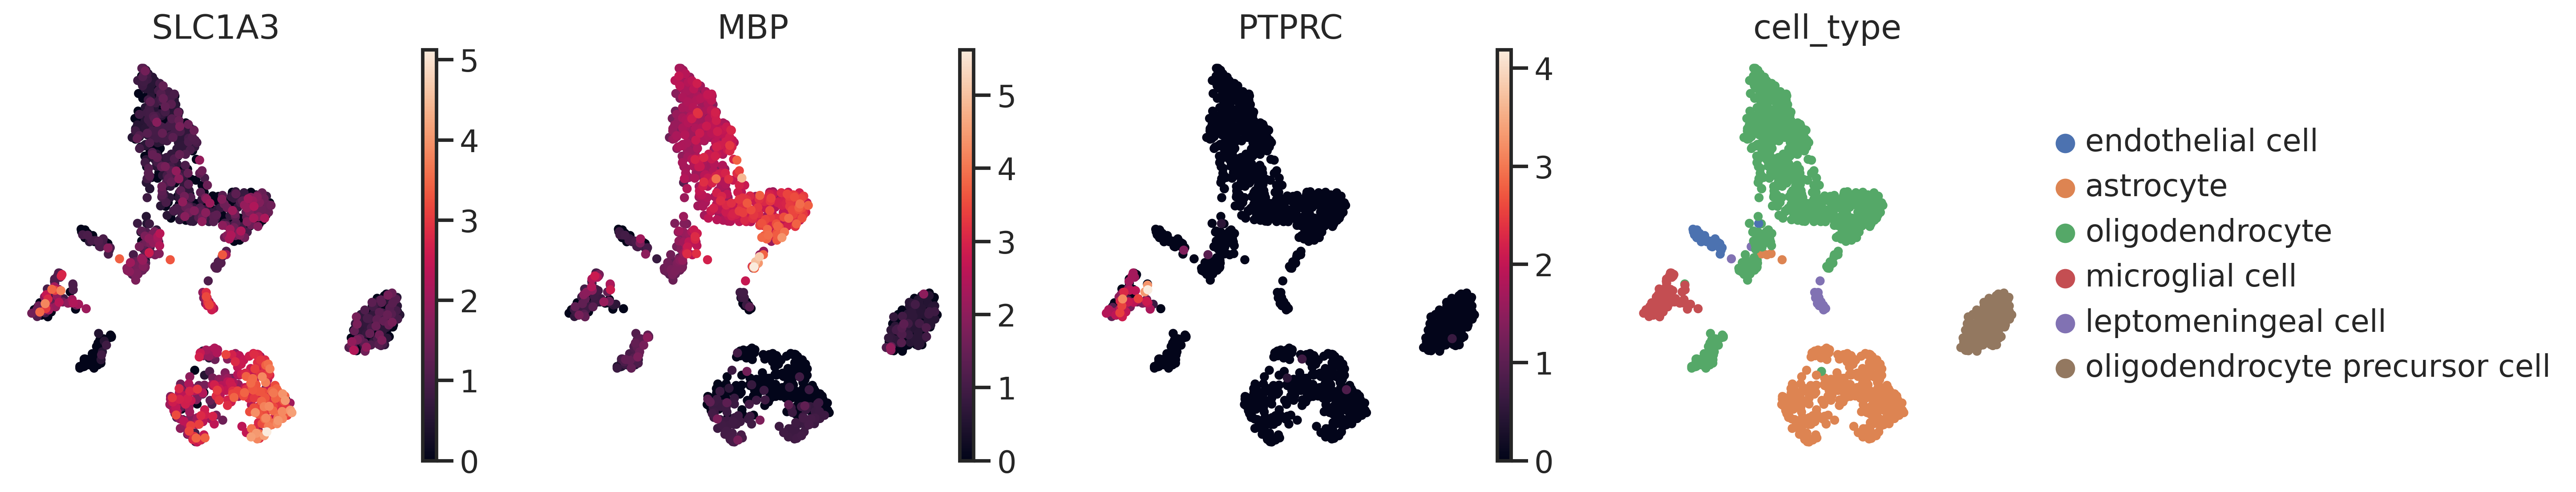

In [50]:
# Отрисовываем получившиеся кластеры (не влияет на значение метрик)
sc.tl.umap(adata, min_dist=0.5) # Рассчёт UMAP
sc.pl.umap(adata, color=["SLC1A3", "MBP", "PTPRC", "cell_type"], frameon=False) # Красим по известным маркерным генам и типам клеток из статьи

In [ ]:
# ARI & NMI
aris = []
nmis = []

for i in np.linspace(0.1,2,20):
  sc.tl.leiden(adata, resolution=i) # Кластеризация алгоритмом Leiden, с ограничением числа кластеров
  ari = scib.metrics.ari(adata, cluster_key='leiden', label_key='cell_type')
  nmi = scib.metrics.nmi(adata, cluster_key='leiden', label_key='cell_type')
  aris.append(ari)
  nmis.append(nmi)

In [52]:
print('ARI:',max(aris))
print('NMI:',max(nmis))

ARI: 0.7883566104314721
NMI: 0.8339948915894446


### Без шкалирования

In [ ]:
# Возвращаем adata к исходному виду
adata = adata_before_log1p.copy()

# Устранение дуплетов
sce.pp.scrublet(adata)
adata = adata[~adata.obs.predicted_doublet]

# Контроль за дисперсией
adata.layers["counts"] = adata.X.copy() # Сохраняем в слой counts значения сырых каунтов
sc.pp.normalize_total(adata) # Нормировка

# Подготовка к кластеризации и снижению размерности
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000,
    layer="counts",
    flavor="seurat_v3",
) # Выделяем высоко вариабельные гены (HVG)
adata.raw = adata # Сохраняем изначальные значения экспрессий
adata = adata[:, adata.var.highly_variable] # Оставляем только подмножество генов, которые относятся к HVG

# Снижение размерности и кластеризация
sc.tl.pca(adata) # Вычисляем PCA
sc.pp.neighbors(adata, n_pcs=15, n_neighbors=20, use_rep='X_pca') # Вычисление графа соседей

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


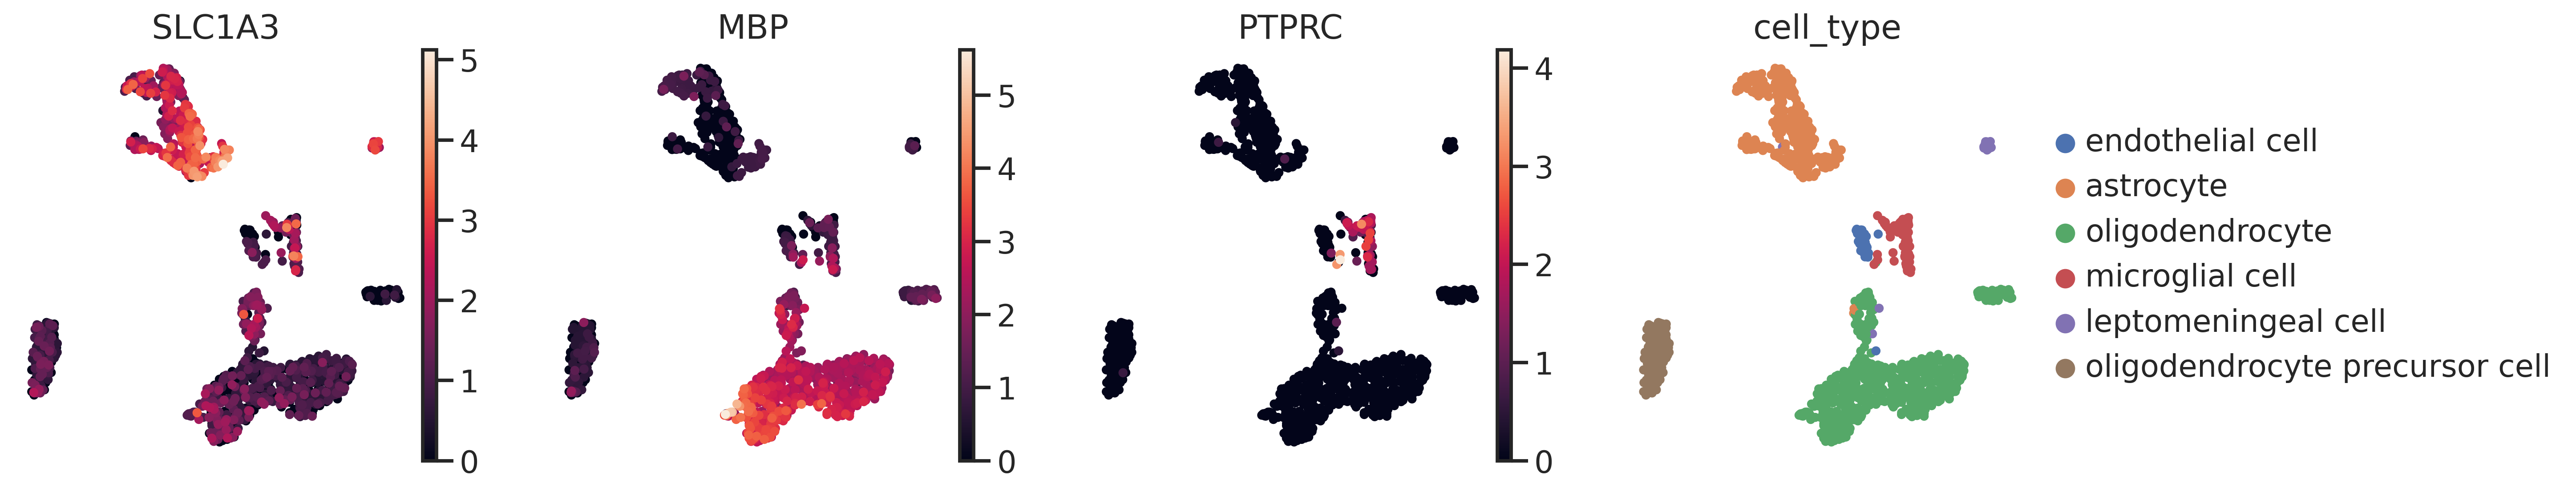

In [54]:
# Отрисовываем получившиеся кластеры (не влияет на значение метрик)
sc.tl.umap(adata, min_dist=0.5) # Рассчёт UMAP
sc.pl.umap(adata, color=["SLC1A3", "MBP", "PTPRC", "cell_type"], frameon=False) # Красим по известным маркерным генам и типам клеток из статьи

In [ ]:
# ARI & NMI
aris = []
nmis = []

for i in np.linspace(0.1,2,20):
  sc.tl.leiden(adata, resolution=i) # Кластеризация алгоритмом Leiden, с ограничением числа кластеров
  ari = scib.metrics.ari(adata, cluster_key='leiden', label_key='cell_type')
  nmi = scib.metrics.nmi(adata, cluster_key='leiden', label_key='cell_type')
  aris.append(ari)
  nmis.append(nmi)

In [56]:
print('ARI:',max(aris))
print('NMI:',max(nmis))

ARI: 0.7901974848641313
NMI: 0.8371056754716534


### Без PCA

In [ ]:
# Возвращаем adata к исходному виду
adata = adata_before_log1p.copy()

# Устранение дуплетов
sce.pp.scrublet(adata)
adata = adata[~adata.obs.predicted_doublet]

# Контроль за дисперсией
adata.layers["counts"] = adata.X.copy() # Сохраняем в слой counts значения сырых каунтов
sc.pp.normalize_total(adata) # Нормировка

# Подготовка к кластеризации и снижению размерности
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000,
    layer="counts",
    flavor="seurat_v3",
) # Выделяем высоко вариабельные гены (HVG)
adata.raw = adata # Сохраняем изначальные значения экспрессий
adata = adata[:, adata.var.highly_variable] # Оставляем только подмножество генов, которые относятся к HVG
sc.pp.scale(adata) # Шкалирование

# Кластеризация
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X') # Вычисление графа соседей, указываем не использовать PCA

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


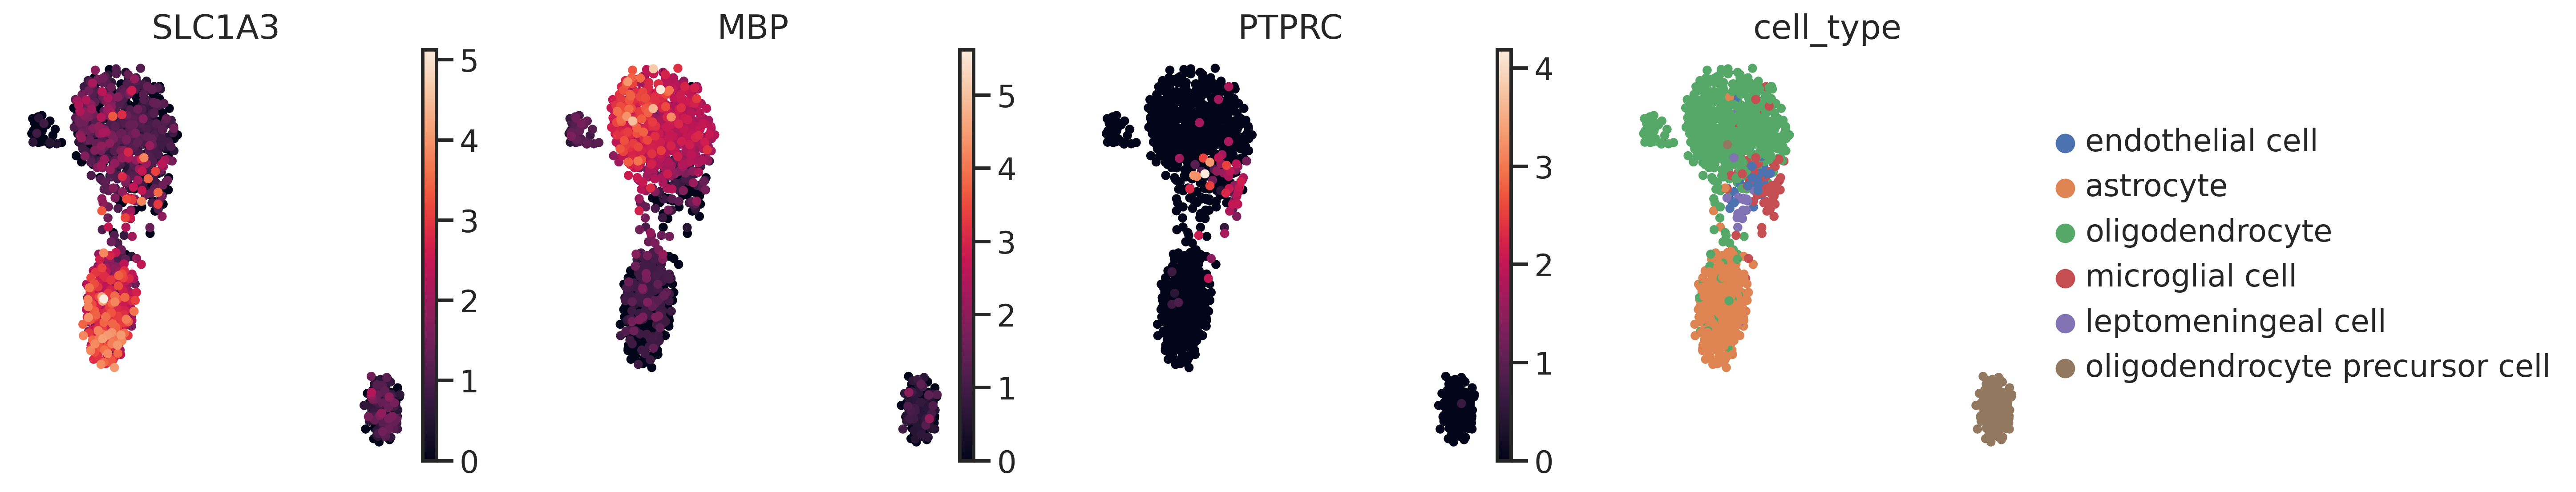

In [58]:
# Отрисовываем получившиеся кластеры (не влияет на значение метрик)
sc.tl.umap(adata, min_dist=0.5) # Рассчёт UMAP
sc.pl.umap(adata, color=["SLC1A3", "MBP", "PTPRC", "cell_type"], frameon=False) # Красим по известным маркерным генам и типам клеток из статьи

In [ ]:
# ARI & NMI
aris = []
nmis = []

for i in np.linspace(0.1,2,20):
  sc.tl.leiden(adata, resolution=i) # Кластеризация алгоритмом Leiden, с ограничением числа кластеров
  ari = scib.metrics.ari(adata, cluster_key='leiden', label_key='cell_type')
  nmi = scib.metrics.nmi(adata, cluster_key='leiden', label_key='cell_type')
  aris.append(ari)
  nmis.append(nmi)

In [60]:
print('ARI:',max(aris))
print('NMI:',max(nmis))

ARI: 0.6881697350509067
NMI: 0.7080311072143048


- Метрика NMI дает наибольшие значения в случаях без шкалирования (0.837) и без отсечки по высоковариабельным генам (0.834). Эти значения очень близки к тому, что получается в результате стандартного пайплайна (0.834), причем без шкалирования даже чуть выше 
- В этих же случаях наиболее высока метрика ARI (0.79 и 0.788 без шкалирования и без отсечки по высоковариабельным генам соответственно) и ее значение близко к значению после стандартного пайплайна (0.788) 
- Можно сделать вывод, что эти этапы анализа менее важны для обработки данных, чем нормировка и PCA (или что выбранный датасет уже обработан этими способами). Без нормировки сильнее падает ARI, а без PCA - NMI

# 1.6 
Напишите функцию, которая будет подбирать лучшие
параметры числа главных компонент, числа соседей в kNN-графе и т. п. для
данного датасета с известной аннотацией. Каковы эти значения в вашем
случае?


### Подбираем лучшее количество главных компонент

In [ ]:
# Возвращаем adata к исходному виду
adata = adata_before_log1p.copy()

# Устранение дуплетов
sce.pp.scrublet(adata)
adata = adata[~adata.obs.predicted_doublet]

# Контроль за дисперсией
adata.layers["counts"] = adata.X.copy() # Сохраняем в слой counts значения сырых каунтов
sc.pp.normalize_total(adata) # Нормировка

# Подготовка к кластеризации и снижению размерности
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000,
    layer="counts",
    flavor="seurat_v3",
) # Выделяем высоко вариабельные гены (HVG)
adata.raw = adata # Сохраняем изначальные значения экспрессий
adata = adata[:, adata.var.highly_variable] # Оставляем только подмножество генов, которые относятся к HVG
sc.pp.scale(adata) # Шкалирование

adata_before_pca = adata.copy() # Сохраняем adata до PCA

In [ ]:
best_aris = []
best_nmis = []

for i in range(1, 50):
  adata = adata_before_pca.copy()

  # Снижение размерности и кластеризация
  print(i)
  sc.tl.pca(data=adata, n_comps=i) # Вычисляем PCA (Defaults to 50, or 1 - minimum dimension size of selected representation)
  sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_pca') # Вычисление графа соседей

  # ARI & NMI
  aris = []
  nmis = []
  for j in np.linspace(0.1,2,20):
    sc.tl.leiden(adata, resolution=j) # Кластеризация алгоритмом Leiden, с ограничением числа кластеров
    ari = scib.metrics.ari(adata, cluster_key='leiden', label_key='cell_type')
    nmi = scib.metrics.nmi(adata, cluster_key='leiden', label_key='cell_type')
    aris.append(ari)
    nmis.append(nmi)
  best_aris.append(max(aris))
  best_nmis.append(max(nmis))

In [63]:
rows = len(best_aris)+1

df_aris = pd.DataFrame({'n_comps':[i for i in range(1, rows)], 'metrics_data':best_aris, 'metrics_type':['ARI' for i in range(1, rows)]})
df_nmis = pd.DataFrame({'n_comps':[i for i in range(1, rows)], 'metrics_data':best_nmis, 'metrics_type':['NMI' for i in range(1, rows)]})

df = pd.concat([df_aris, df_nmis])
df['index'] = [i for i in range(int(df.shape[0]))]
df.set_index('index', inplace=True)

df.sort_values('n_comps', inplace=True)
df.head()

n_comps  metrics_data metrics_type
index                                    
0            1      0.239045          ARI
49           1      0.502780          NMI
1            2      0.533242          ARI
50           2      0.689142          NMI
2            3      0.754882          ARI

<AxesSubplot: xlabel='n_comps', ylabel='metrics_data'>

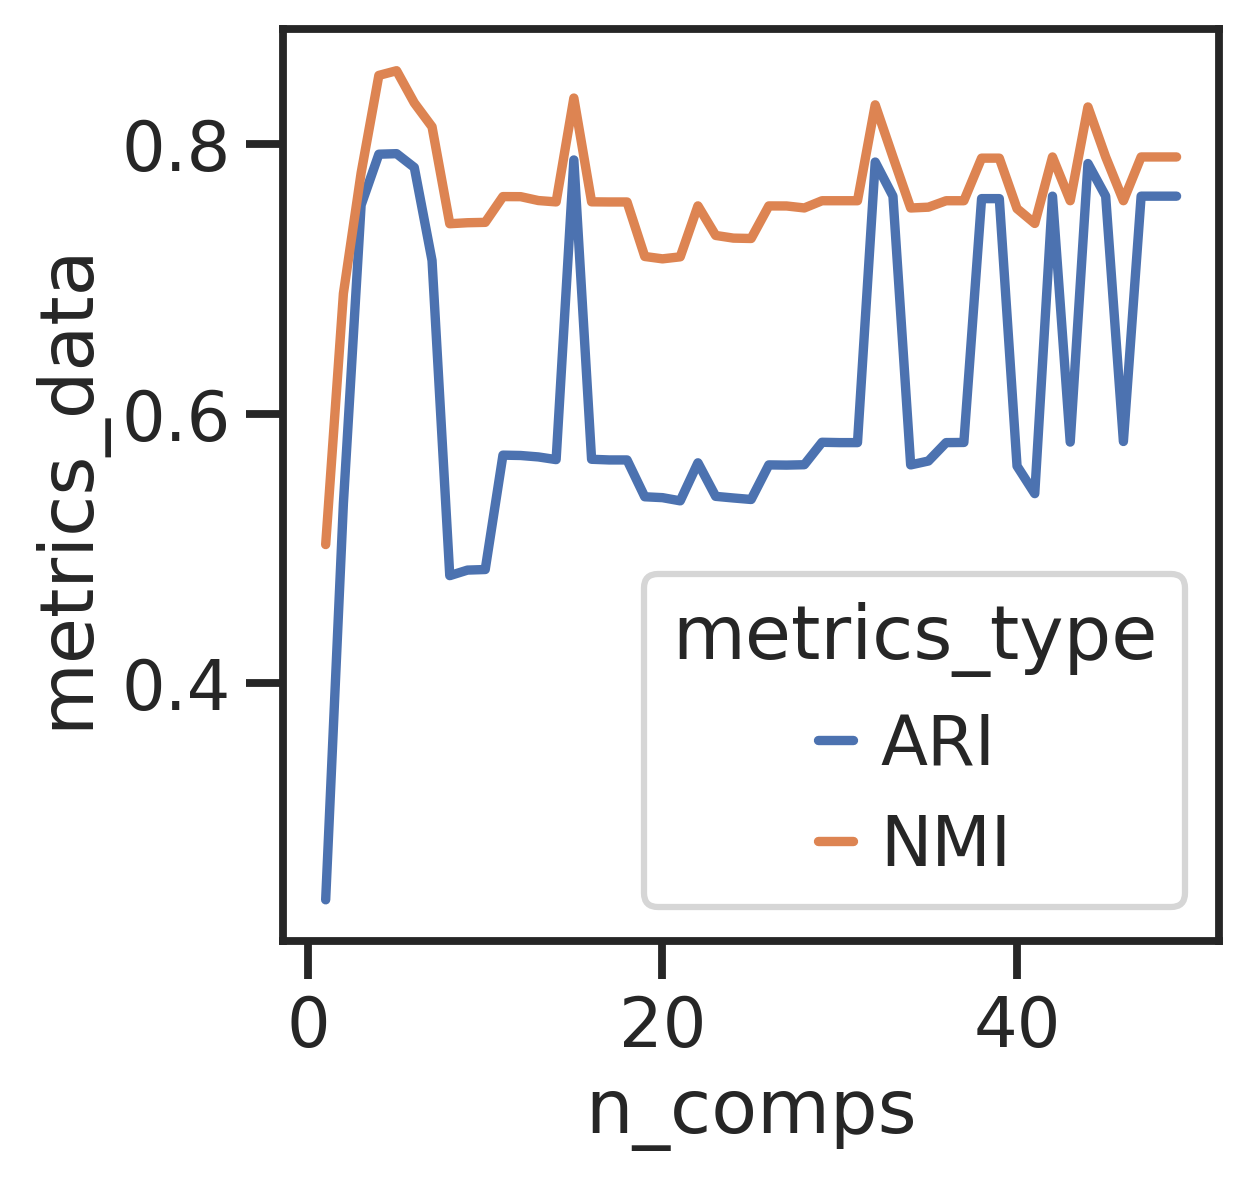

In [64]:
sns.lineplot(data=df, x="n_comps", y="metrics_data", hue="metrics_type")

In [65]:
df.set_index('n_comps', inplace=True)

max_ari = df.loc[df['metrics_type']=='ARI','metrics_data'].idxmax()
print('max ARI is reached with n_comps =', max_ari) 

max_nmi = df.loc[df['metrics_type']=='NMI','metrics_data'].idxmax()
print('max NMI is reached with n_comps =', max_nmi)

max ARI is reached with n_comps = 5
max NMI is reached with n_comps = 5


Согласно метрикам ARI и NMI, наилучшее количество главных компонент - 5

### Подбираем лучшее количество соседей в графе

In [ ]:
best_aris = []
best_nmis = []

adata = adata_before_pca.copy()
sc.tl.pca(data=adata, n_comps=5) # Вычисляем PCA с найденным лучшим количеством главных компонент
adata_before_graph = adata.copy()

for i in range(2, 41):
  adata = adata_before_graph.copy()

  print(i)
  sc.pp.neighbors(adata, n_neighbors=i, use_rep='X_pca') # Вычисление графа соседей (до этого в анализе использовалось n_neighbors=20)

  # ARI & NMI
  aris = []
  nmis = []
  for j in np.linspace(0.1,2,20):
    sc.tl.leiden(adata, resolution=j) # Кластеризация алгоритмом Leiden, с ограничением числа кластеров
    ari = scib.metrics.ari(adata, cluster_key='leiden', label_key='cell_type')
    nmi = scib.metrics.nmi(adata, cluster_key='leiden', label_key='cell_type')
    aris.append(ari)
    nmis.append(nmi)
  best_aris.append(max(aris))
  best_nmis.append(max(nmis))

In [67]:
rows = len(best_aris)+1

df_aris = pd.DataFrame({'n_neighbors':[i for i in range(2, rows+1)], 'metrics_data':best_aris, 'metrics_type':['ARI' for i in range(1, rows)]})
df_nmis = pd.DataFrame({'n_neighbors':[i for i in range(2, rows+1)], 'metrics_data':best_nmis, 'metrics_type':['NMI' for i in range(1, rows)]})

df = pd.concat([df_aris, df_nmis])
df['index'] = [i for i in range(int(df.shape[0]))]
df.set_index('index', inplace=True)

df.sort_values('n_neighbors', inplace=True)
df.head()

n_neighbors  metrics_data metrics_type
index                                        
0                2      0.013706          ARI
39               2      0.372964          NMI
1                3      0.475643          ARI
40               3      0.681825          NMI
2                4      0.606516          ARI

<AxesSubplot: xlabel='n_neighbors', ylabel='metrics_data'>

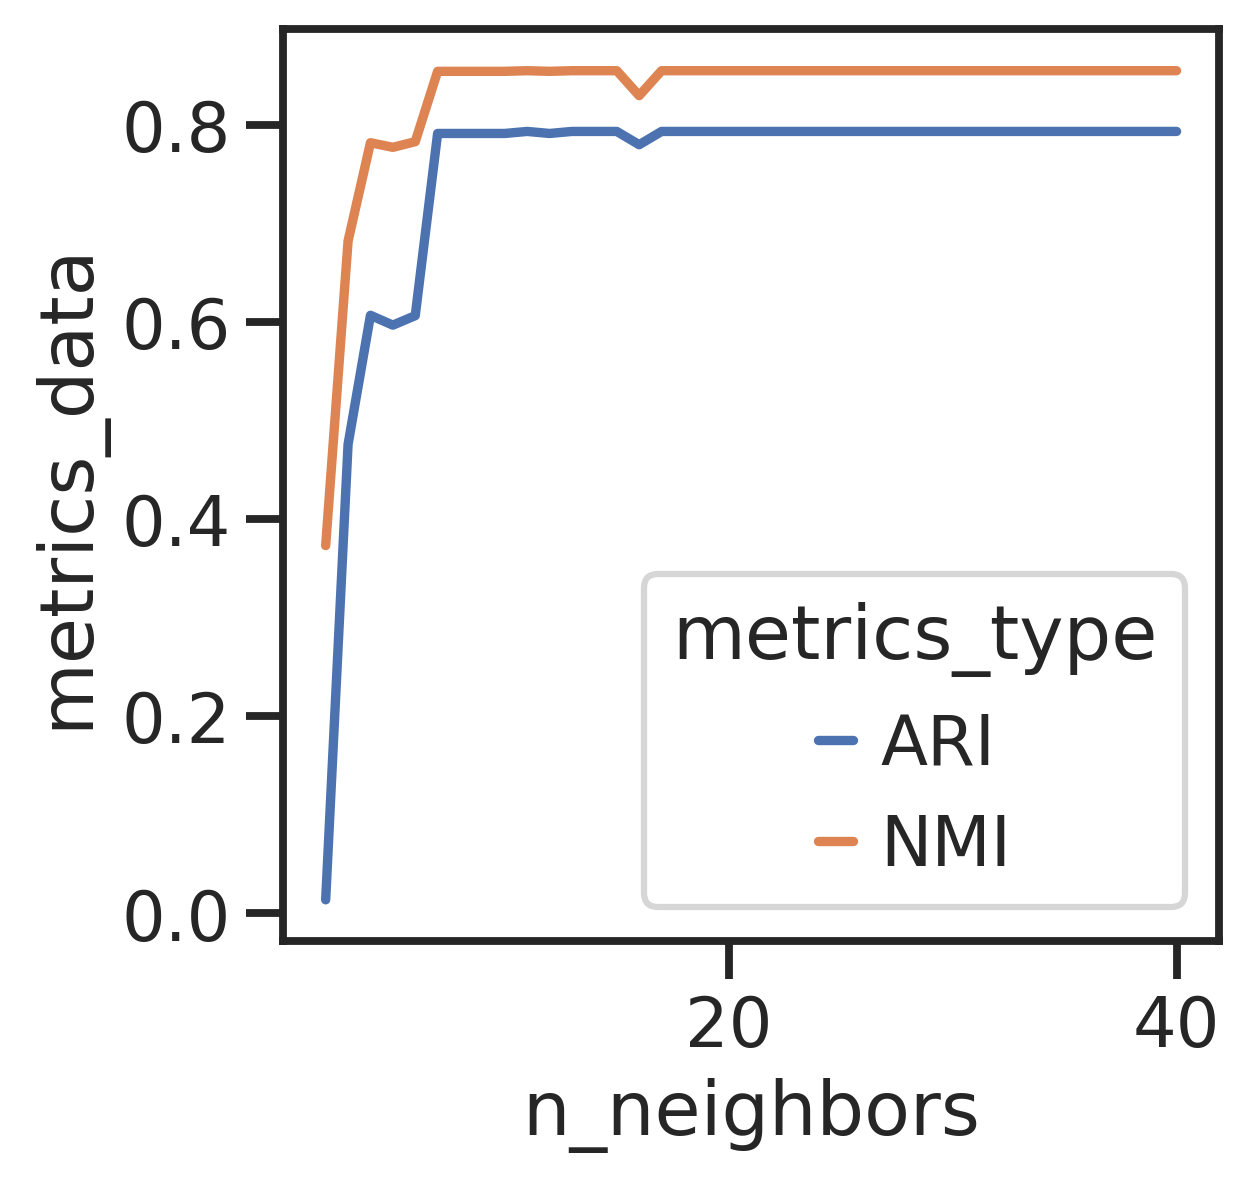

In [68]:
sns.lineplot(data=df, x="n_neighbors", y="metrics_data", hue="metrics_type")

In [69]:
df.set_index('n_neighbors', inplace=True)

max_ari = df.loc[df['metrics_type']=='ARI','metrics_data'].idxmax()
print('max ARI is reached with n_neighbors =', max_ari) 

max_nmi = df.loc[df['metrics_type']=='NMI','metrics_data'].idxmax()
print('max NMI is reached with n_neighbors =', max_nmi)

max ARI is reached with n_neighbors = 11
max NMI is reached with n_neighbors = 11


Можно остановиться на n_neighbors	= 11. Посмотрим, какие кластеры получатся при использовании подобранных параметров:

computing neighbors
    using 'X_pca' with n_pcs = 5
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


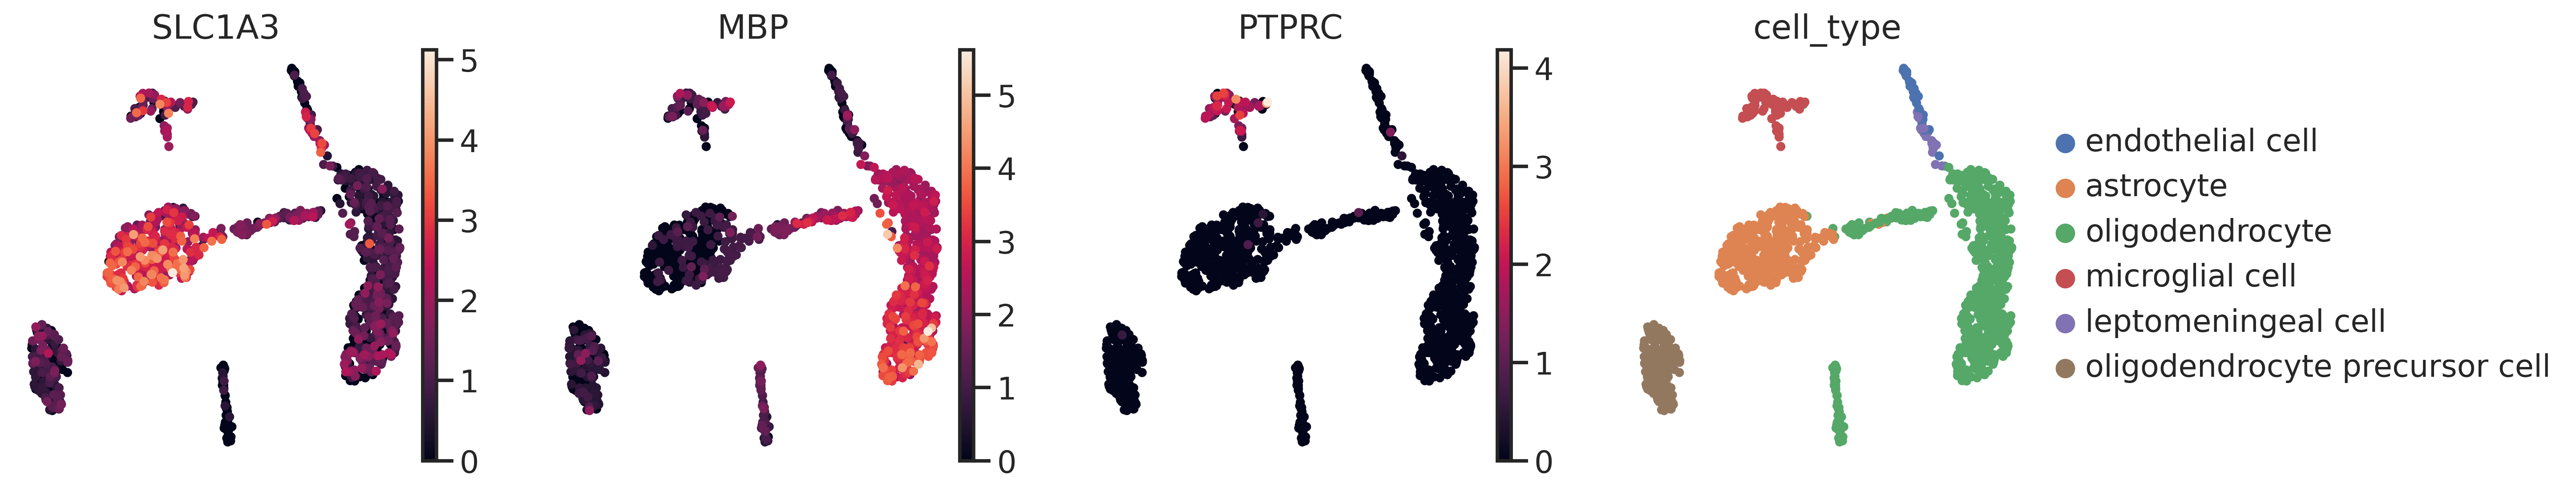

In [70]:
adata = adata_before_graph.copy()

sc.pp.neighbors(adata, n_neighbors=11) # Вычисление графа соседей 

# Отрисовываем получившиеся кластеры
sc.tl.umap(adata, min_dist=0.5) # Рассчёт UMAP
sc.pl.umap(adata, color=["SLC1A3", "MBP", "PTPRC", "cell_type"], frameon=False) # Красим по известным маркерным генам и типам клеток из статьи

# 1.7
Попробуйте воспользоваться нестандартными подходами,
которые мы обсуждали во время занятия — например, кластеризацией при
помощи K-Means на пространстве PCA, используйте SVD вместо PCA, берите
корень вместо логарифмирования — работает ли какой-то из методов для
вашего датасета лучше, чем log1pPF?

### С применением K-Means

In [71]:
import sklearn
from sklearn.cluster import KMeans

In [ ]:
# Возвращаем adata к исходному виду
adata = adata_before_log1p.copy()

# Устранение дуплетов
sce.pp.scrublet(adata)
adata = adata[~adata.obs.predicted_doublet]

# Контроль за дисперсией
adata.layers["counts"] = adata.X.copy() # Сохраняем в слой counts значения сырых каунтов
sc.pp.normalize_total(adata) # Нормировка

# Подготовка к кластеризации и снижению размерности
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000,
    layer="counts",
    flavor="seurat_v3",
) # Выделяем высоко вариабельные гены (HVG)
adata.raw = adata # Сохраняем изначальные значения экспрессий
adata = adata[:, adata.var.highly_variable] # Оставляем только подмножество генов, которые относятся к HVG
sc.pp.scale(adata) # Шкалирование

# Снижение размерности и кластеризация
sc.tl.pca(adata) # Вычисляем PCA

X_pca = adata.obsm['X_pca'] 
# kmeans with k=5
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca) 
adata.obs['kmeans5'] = kmeans.labels_.astype(str)

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


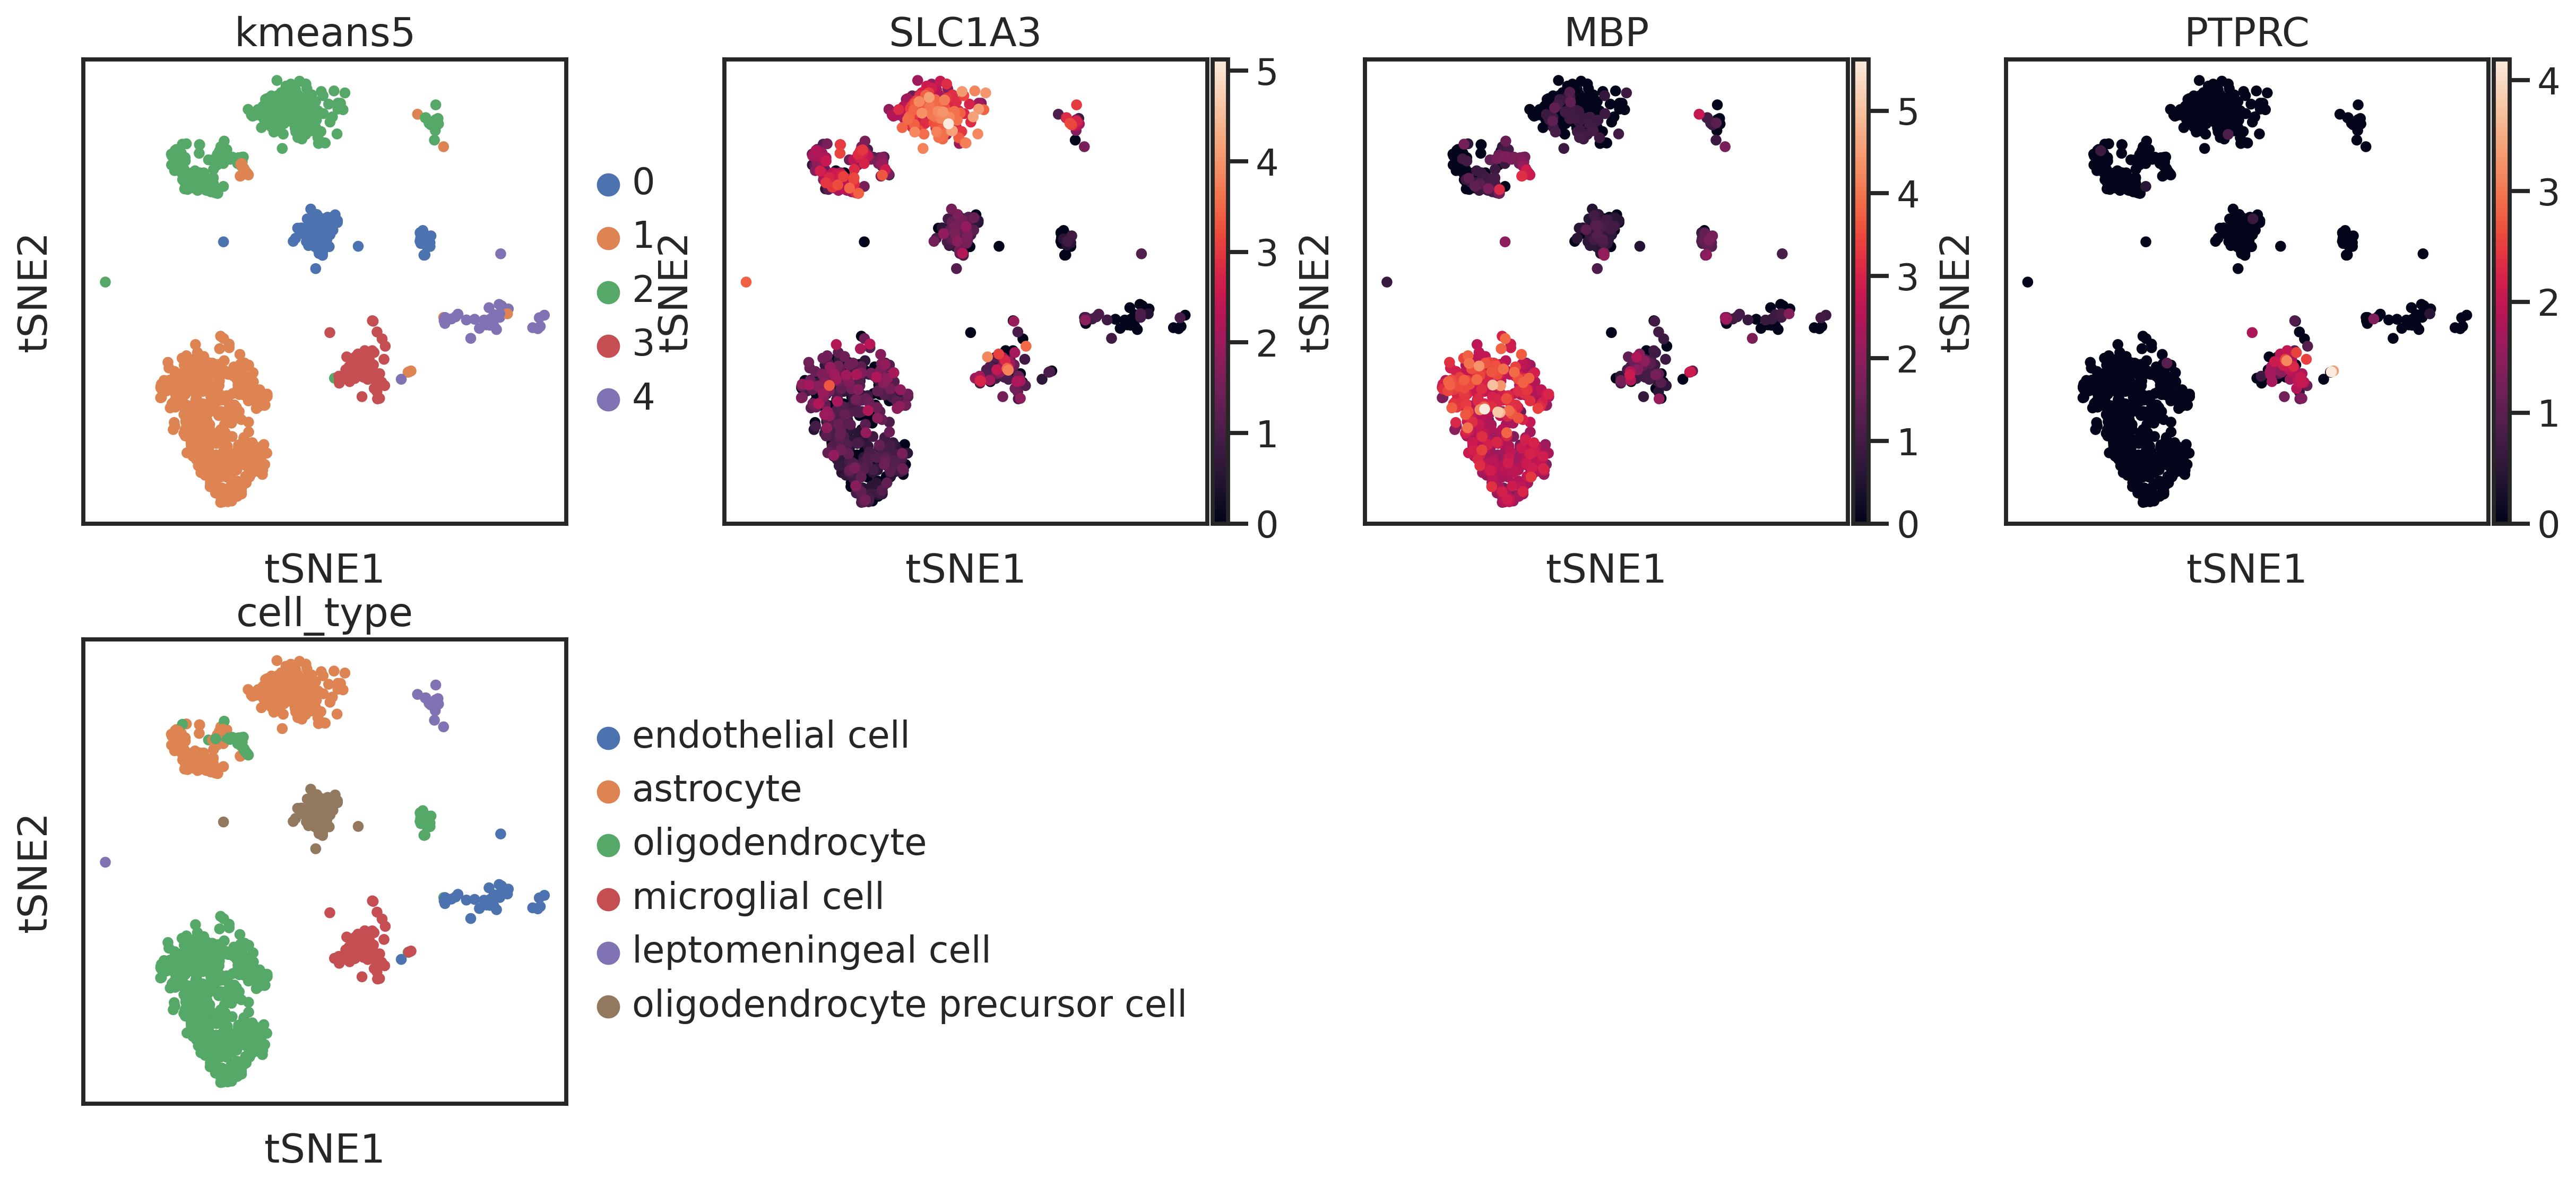

In [73]:
# Отрисовываем получившиеся кластеры
sc.pl.tsne(adata, color=["kmeans5", "SLC1A3", "MBP", "PTPRC", "cell_type"])

In [ ]:
sc.pp.neighbors(adata, use_rep='X_pca')

# ARI & NMI
aris = []
nmis = []
for j in np.linspace(0.1,2,20):
  sc.tl.leiden(adata, resolution=j) # Кластеризация алгоритмом Leiden, с ограничением числа кластеров
  ari = scib.metrics.ari(adata, cluster_key='leiden', label_key='cell_type')
  nmi = scib.metrics.nmi(adata, cluster_key='leiden', label_key='cell_type')
  aris.append(ari)
  nmis.append(nmi)

In [93]:
print('ARI', max(aris))
print('NMI', max(nmis))

ARI 0.5791541872552921
NMI 0.7580709433364485


### SVD вместо PCA

In [ ]:
# Возвращаем adata к исходному виду
adata = adata_before_log1p.copy()

# Устранение дуплетов
sce.pp.scrublet(adata)
adata = adata[~adata.obs.predicted_doublet]

# Контроль за дисперсией
adata.layers["counts"] = adata.X.copy() # Сохраняем в слой counts значения сырых каунтов
sc.pp.normalize_total(adata) # Нормировка

# Подготовка к кластеризации и снижению размерности
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000,
    layer="counts",
    flavor="seurat_v3",
) # Выделяем высоко вариабельные гены (HVG)
adata.raw = adata # Сохраняем изначальные значения экспрессий
adata = adata[:, adata.var.highly_variable] # Оставляем только подмножество генов, которые относятся к HVG
sc.pp.scale(adata) # Шкалирование

In [81]:
# Снижение размерности и кластеризация
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD()
adata.obsm['svd'] = svd.fit_transform(adata.X) # Вычисляем SVD

sc.pp.neighbors(adata, use_rep='svd') # Вычисление графа соседей

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


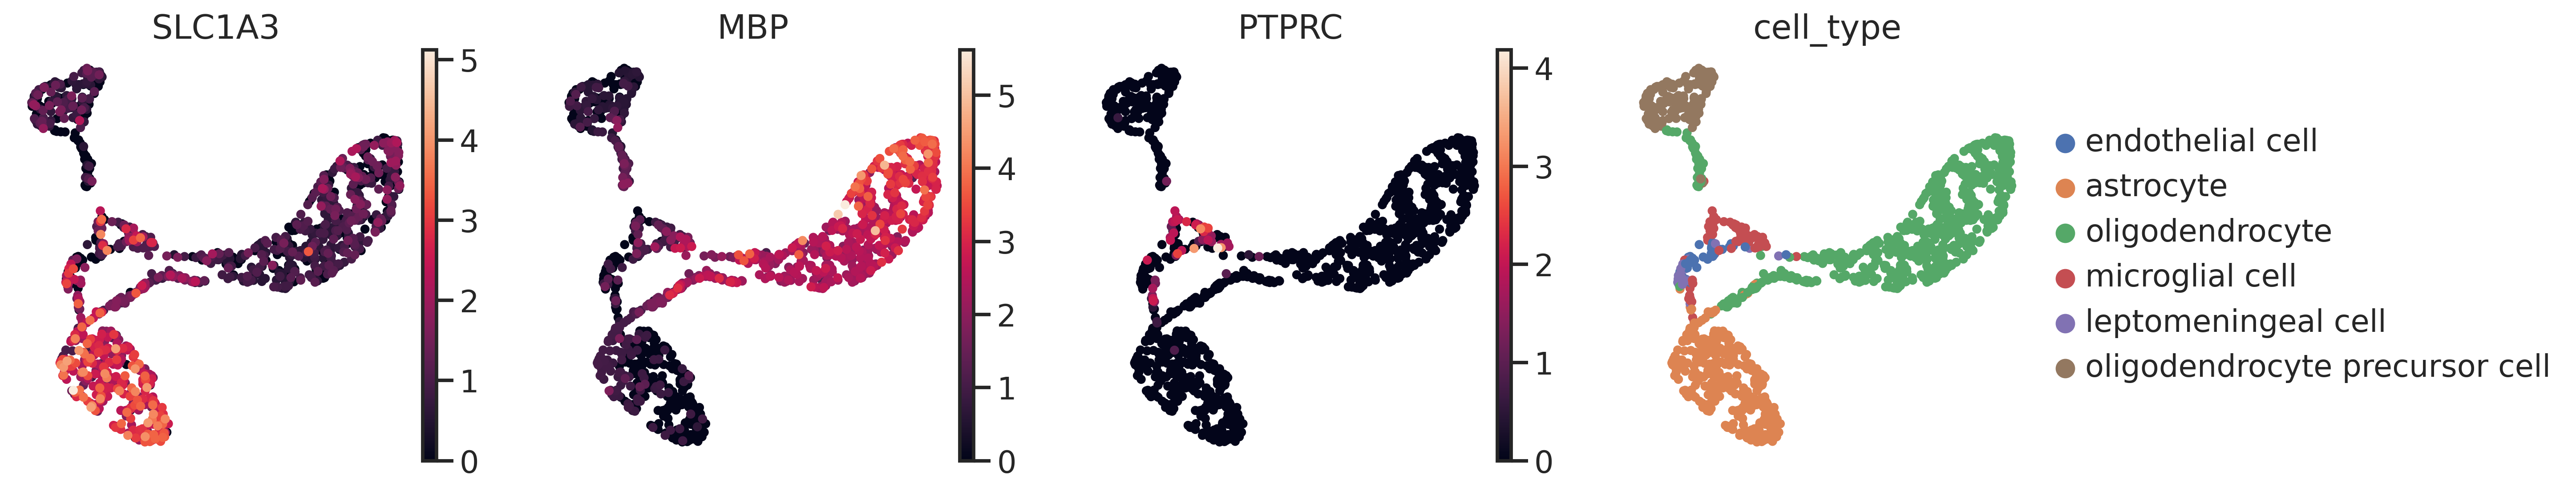

In [82]:
# Отрисовываем получившиеся кластеры
sc.tl.umap(adata, min_dist=0.5) # Рассчёт UMAP
sc.pl.umap(adata, color=["SLC1A3", "MBP", "PTPRC", "cell_type"], frameon=False) # Красим по известным маркерным генам и типам клеток из статьи

In [ ]:
# ARI & NMI
aris = []
nmis = []
for j in np.linspace(0.1,2,20):
  sc.tl.leiden(adata, resolution=j) # Кластеризация алгоритмом Leiden, с ограничением числа кластеров
  ari = scib.metrics.ari(adata, cluster_key='leiden', label_key='cell_type')
  nmi = scib.metrics.nmi(adata, cluster_key='leiden', label_key='cell_type')
  aris.append(ari)
  nmis.append(nmi)

In [84]:
print('ARI', max(aris))
print('NMI', max(nmis))

ARI 0.5328441569891539
NMI 0.6855988204560773


Эти два метода не работают для выбранного датасета лучше, чем log1pPF